## BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

**Business Use Case**

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

**Project Description**

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**About The Dataset**

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



**You are provided with following 2 files:**

**1. train.csv :** Use this dataset to train the model. This file contains all the client and call details as well as the target      variable “subscribed”. You have to train your model using this file.

**2. test.csv :** Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
**Dataset Attributes**

Here is the description of all the variables:

**•	Variable:** Definition

**•	ID:** Unique client ID

**•	age:** Age of the client

**•	job:** Type of job

**•	marital:** Marital status of the client

**•	education:** Education level

**•	default:** Credit in default.

**•	housing:** Housing loan

**•	loan:** Personal loan

**•	contact:** Type of communication

**•	month:** Contact month

**•	day_of_week:** Day of week of contact

**•	duration:** Contact duration

**•	campaign:** number of contacts performed during this campaign to the client

**•	pdays:** number of days that passed by after the client was last contacted

**•	previous:** number of contacts performed before this campaign

**•	poutcome:** outcome of the previous marketing campaign

**Output variable (desired target):**

**•	Subscribed (target):** has the client subscribed a term deposit? (YES/NO)

**Dataset Link-**

•	https://github.com/dsrscientist/dataset5

•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv

•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

**Load the train_dataset and test_dataset**

In [362]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

###### Displaying first and last few rows of train_dataset

In [363]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [364]:
train_data.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


###### Displaying first and  last few rows of test_dataset

In [365]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [366]:
test_data.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


**About Dataset**

**ID:** Unique identifier for each record.

**age:** Age of the individual.

**job:** Occupation or job type.

**marital:** Marital status (e.g., married, divorced, single).

**education:** Level of education.

**default:** Whether the individual has credit in default (yes/no).

**balance:** Balance of the individual's account.

**housing:** Whether the individual has a housing loan (yes/no).

**loan:** Whether the individual has a personal loan (yes/no).

**contact:** Type of communication contact (e.g., cellular, telephone).

**day:** Day of the month when the contact was made.

**month:** Month when the contact was made.

**duration:** Duration of the last contact in seconds.

**campaign:** Number of contacts performed during this campaign for this individual.

**pdays:** Number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted).

**previous:** Number of contacts performed before this campaign for this individual.

**poutcome:** Outcome of the previous marketing campaign (e.g., success, failure, unknown).

**subscribed:** Whether the individual subscribed to a term deposit (yes/no).

### Explanatory Analysis

**For Train_Dataset**

In [367]:
# Checking the dimension of the dataset
train_data.shape

(31647, 18)

In [368]:
train_data.size

569646

In [369]:
# Checking the columns names
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [370]:
# checking the types of the columns
train_data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [371]:
#Groups columns by data type

train_data.columns.to_series().groupby(train_data.dtypes).groups

{int64: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']}

In [372]:
# checking the null values

train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [373]:
# Identify Duplicated Rows in the train_dataset

train_data.duplicated().sum()

0

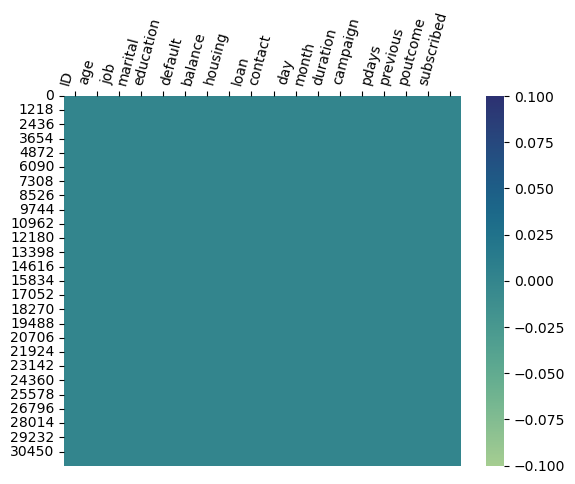

In [374]:
# Lets visualize it using heatmap

#sns.heatmap(train_data.isnull(), cmap=sns.cubehelix_palette(reverse=False))
ax = sns.heatmap(train_data.isnull(), cmap="crest")

# Customize the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='right', rotation=75)
ax.xaxis.tick_top()
plt.show()


In [375]:
i = 0

while i < len(train_data.columns):
    print(train_data[train_data.columns[i]].value_counts(), '\n')
    i += 1

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64 

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

no     31062
yes      585
Name: default, dtype: int64 

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [376]:
# Checking the number of unique value in each column

(train_data.nunique().to_frame("No. of unique values", )).style.background_gradient(cmap="crest")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [377]:
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [378]:
# Checking for categorical columns
categorical_cols = [i for i in train_data.dtypes.index if train_data.dtypes[i] == "object"]
print("Length of Categorical Columns:",len(categorical_cols),"Categorical Columns:", categorical_cols)
print("\n")

# Checking for numerical columns
numerical_cols = [i for i in train_data.dtypes.index if train_data.dtypes[i] != "object"]
print("Length of Numercal Columns:",len(numerical_cols), "Numerical Columns: ", numerical_cols)


Length of Categorical Columns: 10 Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Length of Numercal Columns: 8 Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [379]:
#Statistical summary of Numerical_columns from train_dataset

train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Observation from Statistical summary of dataset**
* The counts of all columns are same which means there are no missing values in the dataset.
* The mean and median are close in column(ID, Day, campaign and previous), indicating a symmetric distribution. The difference     is small, suggesting that there are no extreme outliers affecting the mean significantly.
* The mean significantly larger than median are equal in few columns(balance, duration, pdays and age), it suggests a right-       skewed distribution with a tail extending to the right.
* "Balance" and "Duration," where the mean is significantly larger than the median, it suggests that there are some clients with    very high balances or call durations, pulling the mean upward.
* Some columns have high, moderate and low standard deviation values which are indicating to a wider spread of values, moderate   variability and  low variability.
* we can also see that high difference in 75% and maximum values. Which recognizes the presence of outliers.

###### Correlation Matrix

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


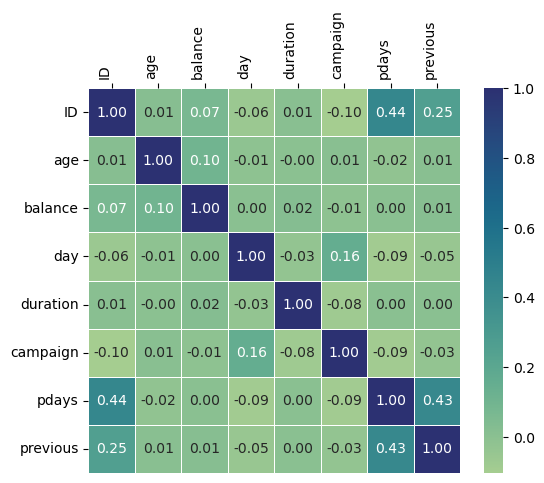

In [380]:
corr = train_data.corr()
display(corr)
plt.figure(figsize=(6, 5))  
ax=sns.heatmap(corr, cmap='crest', annot=True, fmt=".2f", linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='right', rotation=90)
ax.xaxis.tick_top()
plt.show()

***From the above data and visualization of correlation matrix, we can conclue that***

**ID and Other Variables:**
The ID column shows a relatively low correlation with other variables, suggesting that it has minimal linear association with age, balance, day, duration, campaign, pdays, and previous.

**Age and Balance:**
Age and balance exhibit a positive correlation of 0.103, indicating a slight tendency for balance to increase with age.

**Day and Duration:**
The correlation between day and duration is -0.032, implying a weak negative relationship. As the day increases, there is a slight tendency for the call duration to decrease, but the correlation is not strong.

**Duration and Campaign:**
Duration and campaign show a negative correlation of -0.080, suggesting that longer call durations are weakly associated with fewer campaigns. However, this correlation is not highly pronounced.

**Pdays and Previous:**
The most notable correlation is observed between pdays and previous, with a coefficient of 0.428. This positive correlation suggests that as the number of days since the last contact (pdays) increases, there is a tendency for the number of previous contacts to also increase.

**ID and Pdays:**
There is a relatively strong positive correlation of 0.436 between ID and pdays. However, caution should be exercised when interpreting such correlations involving an identifier variable, as they might not have meaningful implications.

**Pdays and Duration:**
The correlation between pdays and duration is very weak (0.000529), indicating almost no linear relationship between these two variables.

**Campaign and Previous:**
Campaign and previous have a negative correlation of -0.033, suggesting a weak tendency for a lower number of previous contacts to be associated with a higher number of campaigns.

### **For Test_Dataset**

In [381]:
# Checking the dimension of the dataset
test_data.shape

(13564, 17)

In [382]:
test_data.size

230588

In [383]:
# Checking the columns names
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [384]:
# checking the types of the columns
test_data.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [385]:
# checking the null values

test_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [386]:
#Identify Duplicated Rows in the train_dataset

test_data.duplicated().sum()

0

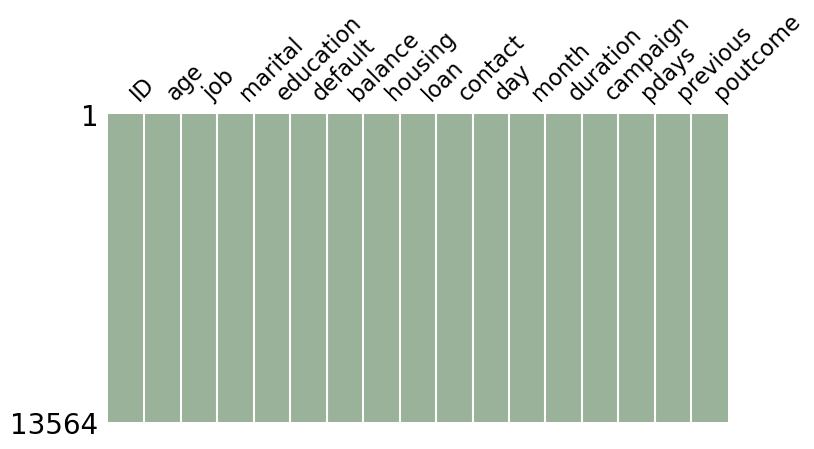

In [387]:
#Create a matrix plot to visualize missing data

msno.matrix(test_data, figsize=(8, 4), color=(0.6, 0.7, 0.6), sparkline=False)

plt.show()

In [388]:
[test_data[column].value_counts() for column in test_data.columns]

[38441    1
 23664    1
 23378    1
 18945    1
 32574    1
         ..
 4606     1
 23686    1
 35672    1
 8550     1
 34839    1
 Name: ID, Length: 13564, dtype: int64,
 32    628
 34    609
 35    580
 31    579
 33    566
      ... 
 95      1
 86      1
 92      1
 89      1
 90      1
 Name: age, Length: 75, dtype: int64,
 blue-collar      2890
 management       2819
 technician       2290
 admin.           1540
 services         1251
 retired           690
 entrepreneur      479
 self-employed     456
 unemployed        398
 housemaid         366
 student           303
 unknown            82
 Name: job, dtype: int64,
 married     8119
 single      3868
 divorced    1577
 Name: marital, dtype: int64,
 secondary    6978
 tertiary     4000
 primary      2043
 unknown       543
 Name: education, dtype: int64,
 no     13334
 yes      230
 Name: default, dtype: int64,
  0       1044
  1         58
  2         47
  3         46
  4         44
          ... 
 -140        1
  6495      

In [389]:
# Checking the number of unique value in each column

(test_data.nunique().to_frame("No. of unique values", )).style.background_gradient(cmap= 'icefire_r')

,No. of unique values
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


In [390]:
# Checking for categorical columns
categorical_col = [i for i in test_data.dtypes.index if test_data.dtypes[i] == "object"]
print("Length of Categorical Columns:",len(categorical_col),"Categorical Columns:", categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = [i for i in test_data.dtypes.index if test_data.dtypes[i] != "object"]
print("Length of Numercal Columns:",len(numerical_col), "Numerical Columns: ", numerical_col)

Length of Categorical Columns: 9 Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Length of Numercal Columns: 8 Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [391]:
#Statistical summary of Numerical_columns from test_dataset

test_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


**Observation from Statistical summary of dataset**

All columns exhibit identical counts, signifying an absence of missing values within the dataset. In columns such as ID, Day, campaign, and previous, the close proximity of mean and median implies a symmetric distribution, with the minor difference indicating a lack of extreme outliers significantly impacting the mean.

Certain columns, namely balance, duration, pdays, and age, showcase a scenario where the mean is considerably larger than the median. This discrepancy suggests a right-skewed distribution, indicating a tail extending to the right. Specifically, in "Balance" and "Duration," where the mean surpasses the median significantly, it suggests the presence of clients with exceptionally high balances or call durations, exerting an upward pull on the mean.

There is variability in the standard deviation values across columns, with some exhibiting high, moderate, or low values. This disparity in standard deviations implies a diverse spread of values, ranging from high variability to low variability.

Furthermore, the observation of a substantial difference between the 75th percentile and maximum values across columns highlights the presence of outliers. This discrepancy is particularly noteworthy and calls attention to potential data points that significantly deviate from the overall distribution.

###### Correlation Matrix ------test_data

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000


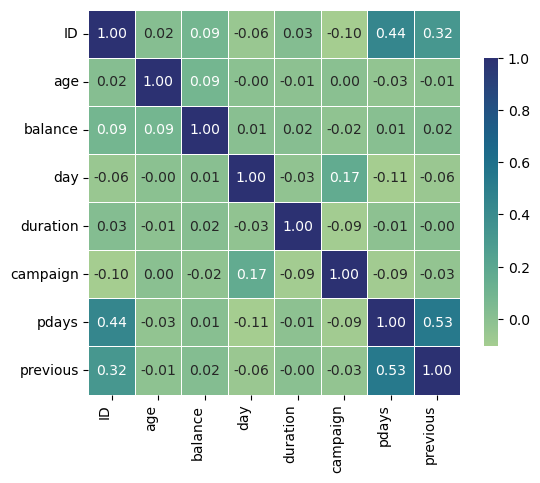

In [392]:
display(test_data.corr())
plt.figure(figsize=(6, 5))
sns.heatmap(test_data.corr(), cmap='crest', annot=True, fmt=".2f", linewidths=.5,cbar_kws={"shrink": .75} ).set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

****From the above data and visualization of correlation matrix, we can conclue that***

**age and balance:** have Positive correlation. As age increases, balance tends to increase (or vice versa).

**duration and day:** The negative sign suggests that as one variable increases, the other tends to decrease slightly, but the relationship is weak.

**duration and campaign:** have Negative correlation. Longer call durations might be associated with fewer campaigns.

**pdays and previous:** A positive correlation could suggest that more days since the last contact is associated with more previous contacts.

### For Train_dataset

##### Univariant Analysis ------categorical_cols

In [393]:
for col in categorical_cols:
    print(f"{'**'*15}\n{train_data[col].value_counts()}\n")

******************************
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

******************************
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

******************************
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

******************************
no     31062
yes      585
Name: default, dtype: int64

******************************
yes    17584
no     14063
Name: housing, dtype: int64

******************************
no     26516
yes     5131
Name: loan, dtype: int64

******************************
cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

******************************
may    9669
jul    4844
a

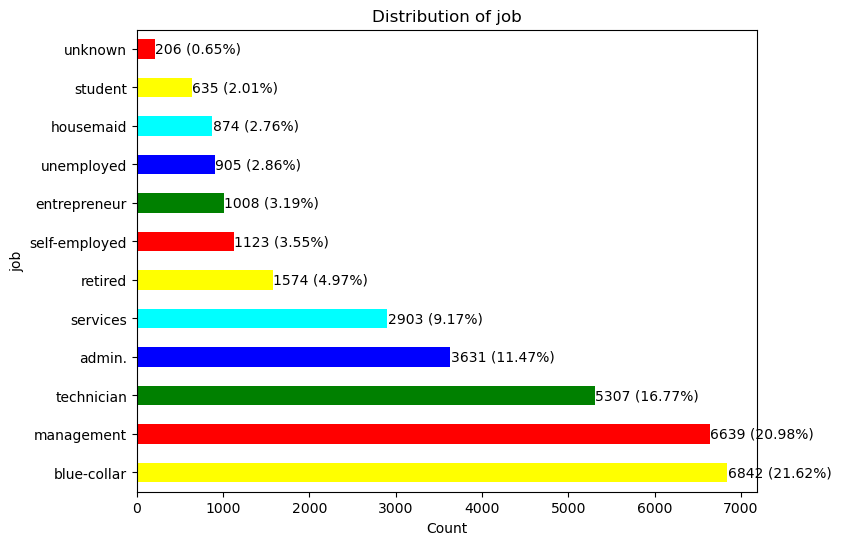

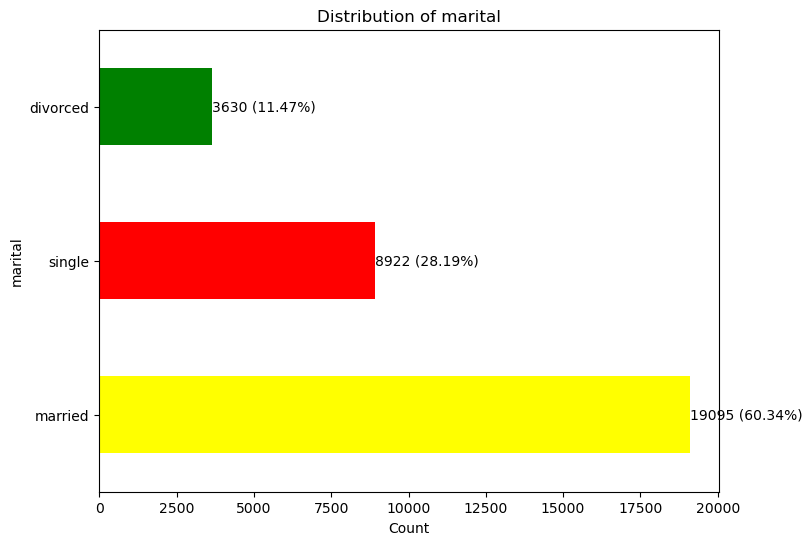

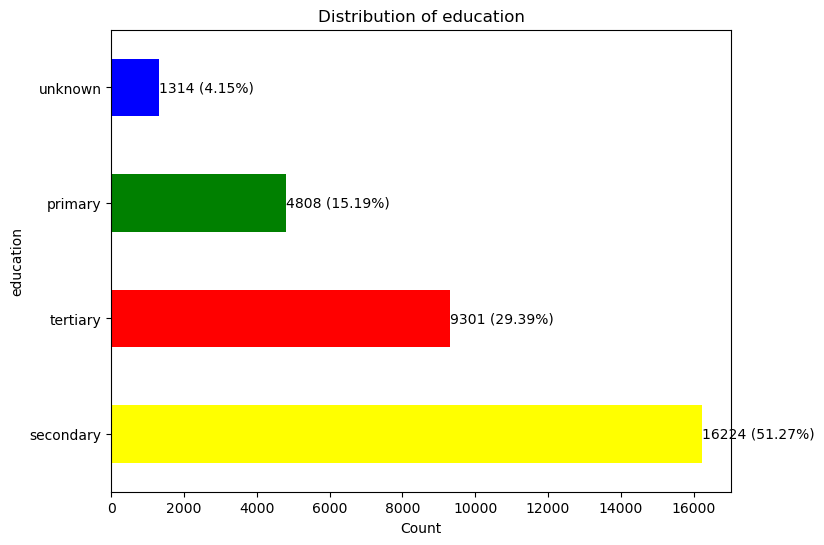

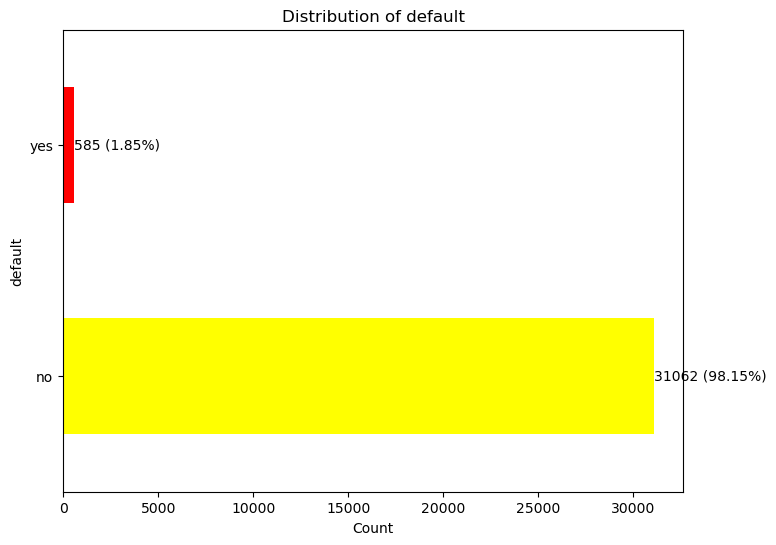

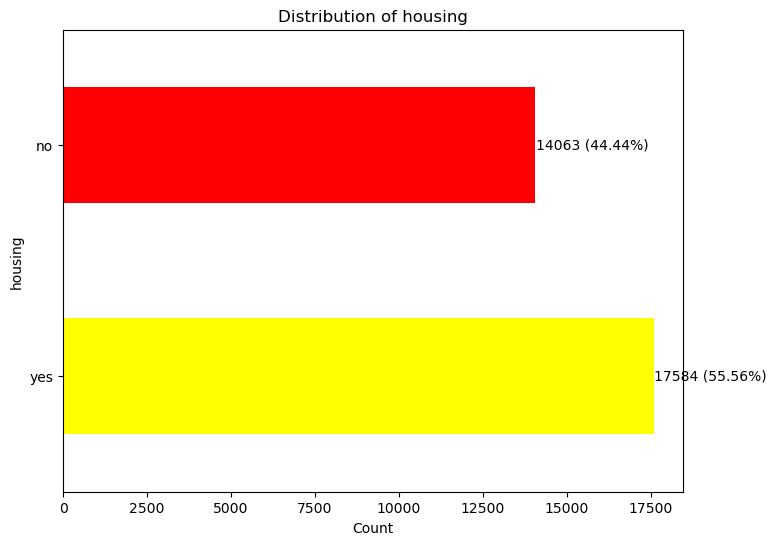

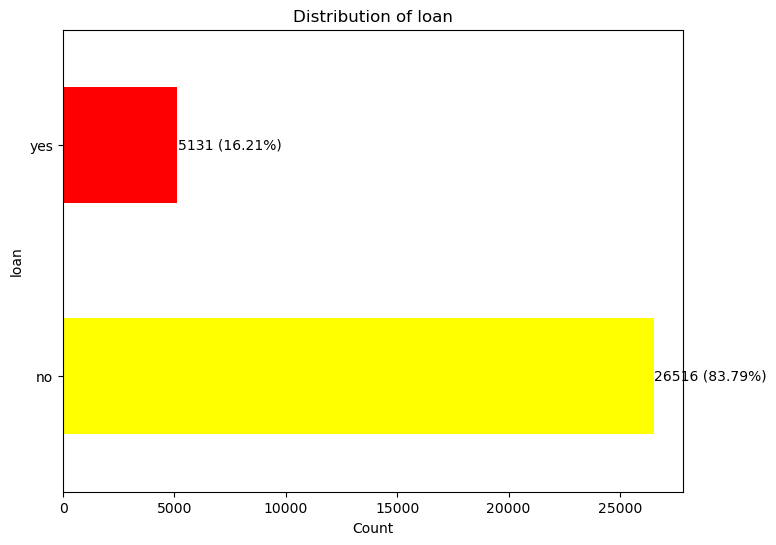

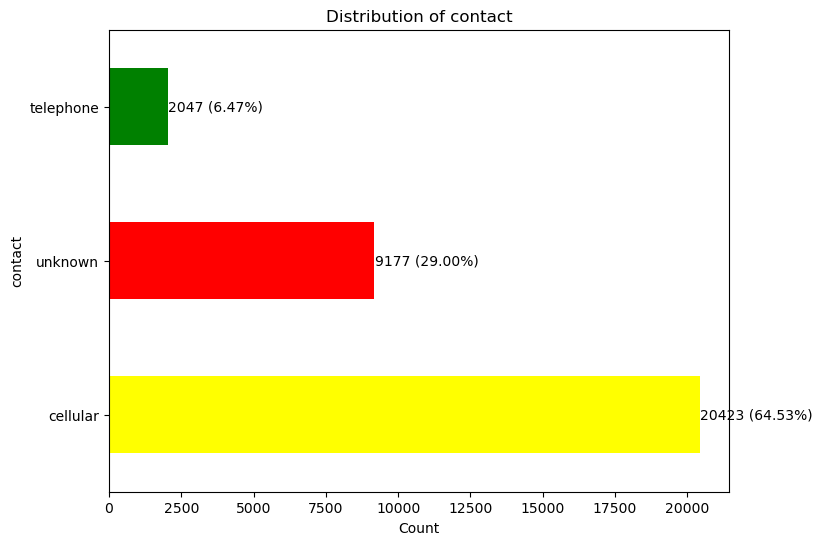

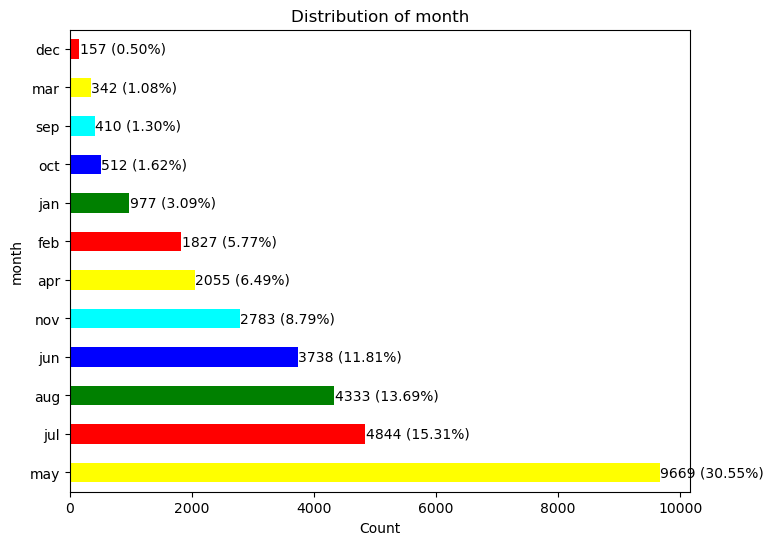

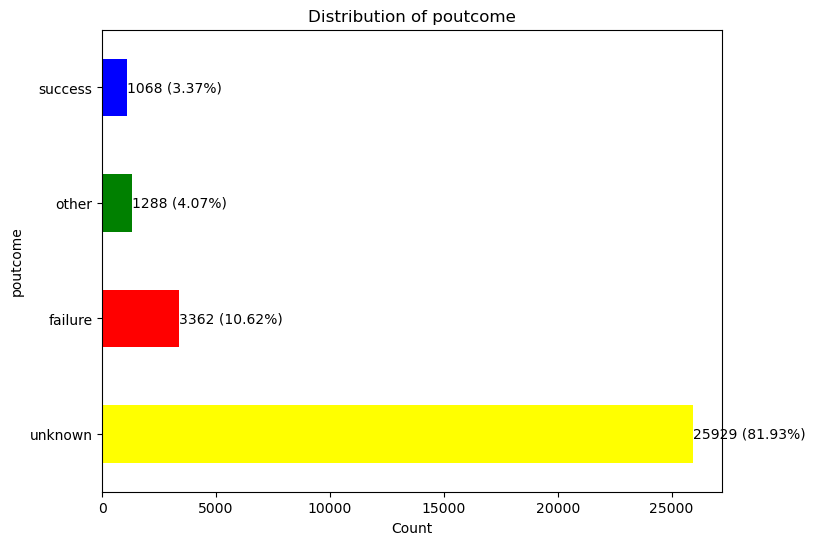

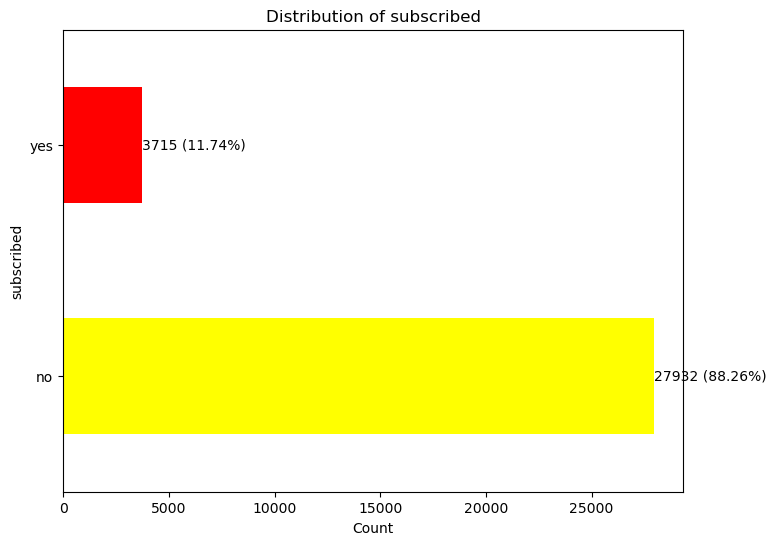

In [394]:
for column in categorical_cols:
    plt.figure(figsize=(8, 6))
    value_counts = train_data[column].value_counts()
    total_count = len(train_data[column])

    ax = value_counts.plot(kind='barh', color=['yellow', 'red', 'green', 'blue', 'cyan'])
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

    for i, count in enumerate(value_counts):
        percentage = count / total_count * 100
        combined_text = f'{count} ({percentage:.2f}%)'
        plt.text(count + 5, i, combined_text, ha='left', va='center')

    plt.show()

***Based on the provided data and visual representations, we can draw various conclusions:***

**Job** : The 'job' column categorizes individuals' occupations into 12 unique job types, with 'blue-collar' being the most common, comprising 6,842 individuals, representing the highest percentage at 21.62.

**Marital** : The column labeled 'marital' indicates the marital status of individuals, with three distinct categories. The most prevalent status is 'married,' occurring 19,095 times, representing the highest percentage at 60.34.

**education** : The 'education' column categorizes individuals into four unique education levels. The most common is 'Secondary,' with 16,224 individuals having this education, representing the highest percentage at 51.27.

**default** : The 'default' column probably signifies whether individuals have defaulted on credit, with two unique values: 'no' and 'yes.' The majority, totaling 31,062 individuals, do not have credit in default, representing the highest percentage at 98.15.

**housing** : The 'housing' column potentially reflects whether individuals have housing loans, with two distinct values: 'no' and 'yes.' The prevalent situation is that 17,584 individuals have housing loans, representing the highest percentage at 55.56.

**loan** : The 'loan' column indicates the presence of personal loans for individuals, with two unique values: 'no' and 'yes.' The majority, totaling 26,516 individuals, do not possess personal loans, representing the highest percentage at 83.79. 

**contact** : The 'contact' column potentially signifies the communication method, with three unique options: 'cellular,' 'telephone,' and 'unknown.' The prevailing contact method is 'cellular,' observed in 20,423 individuals, representing the highest percentage at 64.53.

**month** : The 'month' column denotes the month when contacts were initiated, featuring 12 unique months. The most commonly utilized contact month is 'May,' recorded for 9,669 individuals, representing the highest percentage at 30.55.

**poutcome** : The 'poutcome' column could indicate the result of a prior marketing campaign, encompassing four unique outcomes: 'unknown,' 'failure,' 'other,' and 'success.' The prevalent outcome is 'unknown,' observed in 25,929 individuals, representing the highest percentage at 81.93.

**subscribed** : The 'subscribed' column probably indicates whether individuals subscribed to a service or product, with two unique values: 'no' and 'yes.' The prevailing scenario is that 27,932 individuals did not subscribe, representing the highest percentage at 88.26.

**The categorical variables graphs show a progressive decrease from Bottom to Top , and they include percentage values that provide insights into the quantity differences, facilitating a better understanding of the importance of each quantity.**

#### Bivariant Analysis ---------categorical_cols

In [395]:
for col in tqdm(train_data.select_dtypes(include='object').columns):
    print(col,':')
    unique_values = train_data[col].unique()
    print('Length of unique value: ',len(unique_values), unique_values)
    print('----'*5)

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2237.44it/s]

job :
Length of unique value:  12 ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
--------------------
marital :
Length of unique value:  3 ['married' 'divorced' 'single']
--------------------
education :
Length of unique value:  4 ['unknown' 'secondary' 'tertiary' 'primary']
--------------------
default :
Length of unique value:  2 ['no' 'yes']
--------------------
housing :
Length of unique value:  2 ['no' 'yes']
--------------------
loan :
Length of unique value:  2 ['no' 'yes']
--------------------
contact :
Length of unique value:  3 ['telephone' 'cellular' 'unknown']
--------------------
month :
Length of unique value:  12 ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
--------------------
poutcome :
Length of unique value:  4 ['unknown' 'success' 'failure' 'other']
--------------------
subscribed :
Length of unique value:  2 ['no' 'yes']
--------------

In [396]:
def format_bold(text):
    return f"\033[1m{text}\033[0m"  

for i in tqdm(categorical_cols):
    grouped_data = train_data.groupby(['subscribed', i]).size()
    #print(grouped_data)
    
    print(f"Counts for {i}:\n")
    
    print(f"YES_subscribed : {format_bold(grouped_data.loc['yes'])}\n",  '\n')
    
    print(f"NO_subscribed : {format_bold(grouped_data.loc['no'])}\n", '-------' * 15)

    # Calculate total counts for 'no' and 'yes'
    total_no = grouped_data['no'].sum() if 'no' in grouped_data.index.levels[0] else 0
    total_yes = grouped_data['yes'].sum() if 'yes' in grouped_data.index.levels[0] else 0

    print(f"\nTotal 'no' count for {i}: {total_no}", '\n')
    print(f"Total 'yes' count for {i}: {total_yes}", '\n')

    # Calculate percentages
    total_count = total_no + total_yes
    percentage_no = (total_no / total_count) * 100 if total_count > 0 else 0
    percentage_yes = (total_yes / total_count) * 100 if total_count > 0 else 0

    print(f"\nPercentage of 'no' overall: {percentage_no:.2f}%", '\n')
    print(f"Percentage of 'yes' overall: {percentage_yes:.2f}%", '\n')
    
    print('\n' + '=' * 60 + '\n')

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 160.45it/s]

Counts for job:

YES_subscribed : job
admin.           452
blue-collar      489
entrepreneur      85
housemaid         79
management       923
retired          362
self-employed    140
services         254
student          182
technician       594
unemployed       129
unknown           26
dtype: int64
 

NO_subscribed : job
admin.           3179
blue-collar      6353
entrepreneur      923
housemaid         795
management       5716
retired          1212
self-employed     983
services         2649
student           453
technician       4713
unemployed        776
unknown           180
dtype: int64
 ---------------------------------------------------------------------------------------------------------

Total 'no' count for job: 27932 

Total 'yes' count for job: 3715 


Percentage of 'no' overall: 88.26% 

Percentage of 'yes' overall: 11.74% 



Counts for marital:

YES_subscribed : marital
divorced     445
married     1919
single      1351
dtype: int64
 

NO_subscribed : marital
divorc

In [397]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('job')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

               count  sum  percentage_subscribed
job                                             
admin.          3631  452              12.448361
blue-collar     6842  489               7.147033
entrepreneur    1008   85               8.432540
housemaid        874   79               9.038902
management      6639  923              13.902696
retired         1574  362              22.998729
self-employed   1123  140              12.466607
services        2903  254               8.749569
student          635  182              28.661417
technician      5307  594              11.192764
unemployed       905  129              14.254144
unknown          206   26              12.621359


In [398]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('marital')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

          count   sum  percentage_subscribed
marital                                     
divorced   3630   445              12.258953
married   19095  1919              10.049751
single     8922  1351              15.142345


In [399]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('education')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

           count   sum  percentage_subscribed
education                                    
primary     4808   427               8.881032
secondary  16224  1697              10.459813
tertiary    9301  1415              15.213418
unknown     1314   176              13.394216


In [400]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('month')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

       count  sum  percentage_subscribed
month                                   
apr     2055  384              18.686131
aug     4333  520              12.000923
dec      157   72              45.859873
feb     1827  305              16.694034
jan      977   97               9.928352
jul     4844  441               9.104046
jun     3738  383              10.246121
mar      342  174              50.877193
may     9669  649               6.712173
nov     2783  275               9.881423
oct      512  224              43.750000
sep      410  191              46.585366


In [401]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('default')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

         count   sum  percentage_subscribed
default                                    
no       31062  3674              11.827957
yes        585    41               7.008547


In [402]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('housing')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

         count   sum  percentage_subscribed
housing                                    
no       14063  2365              16.817180
yes      17584  1350               7.677434


In [403]:
train_data['subscribed_binary'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Calculate the total count and sum of subscriptions month-wise
monthwise_counts = train_data.groupby('loan')['subscribed_binary'].agg(['count', 'sum'])

# Calculate the percentage
monthwise_counts['percentage_subscribed'] = (monthwise_counts['sum'] / monthwise_counts['count']) * 100

# Display the result
print(monthwise_counts)

      count   sum  percentage_subscribed
loan                                    
no    26516  3384              12.762106
yes    5131   331               6.450984


<Figure size 1500x800 with 0 Axes>

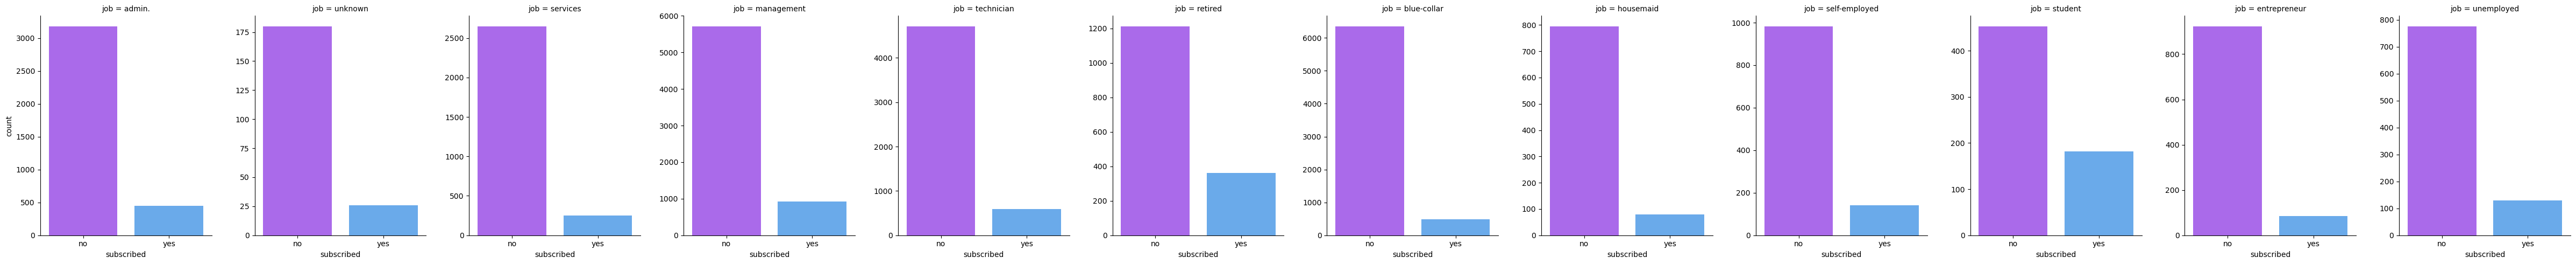

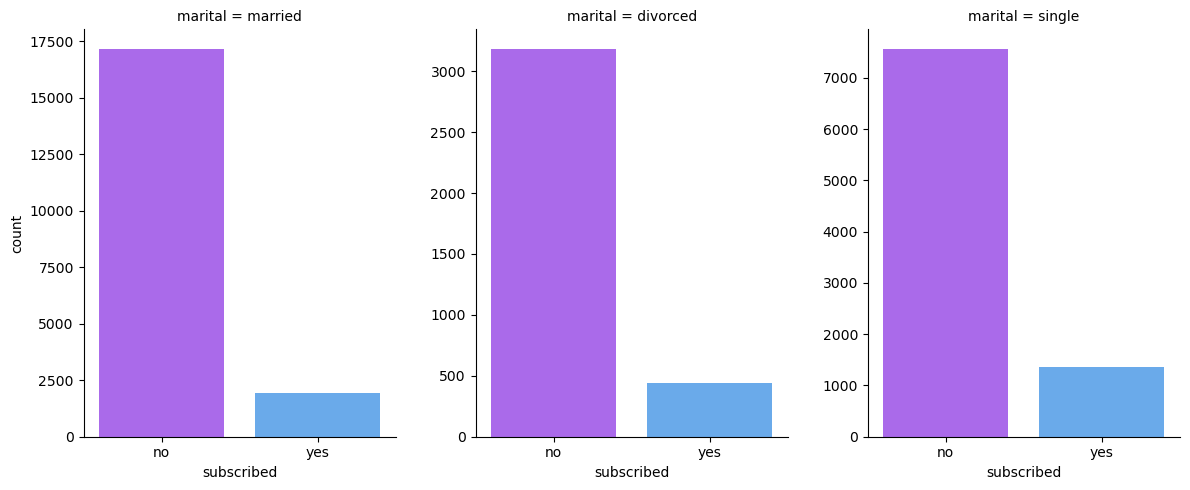

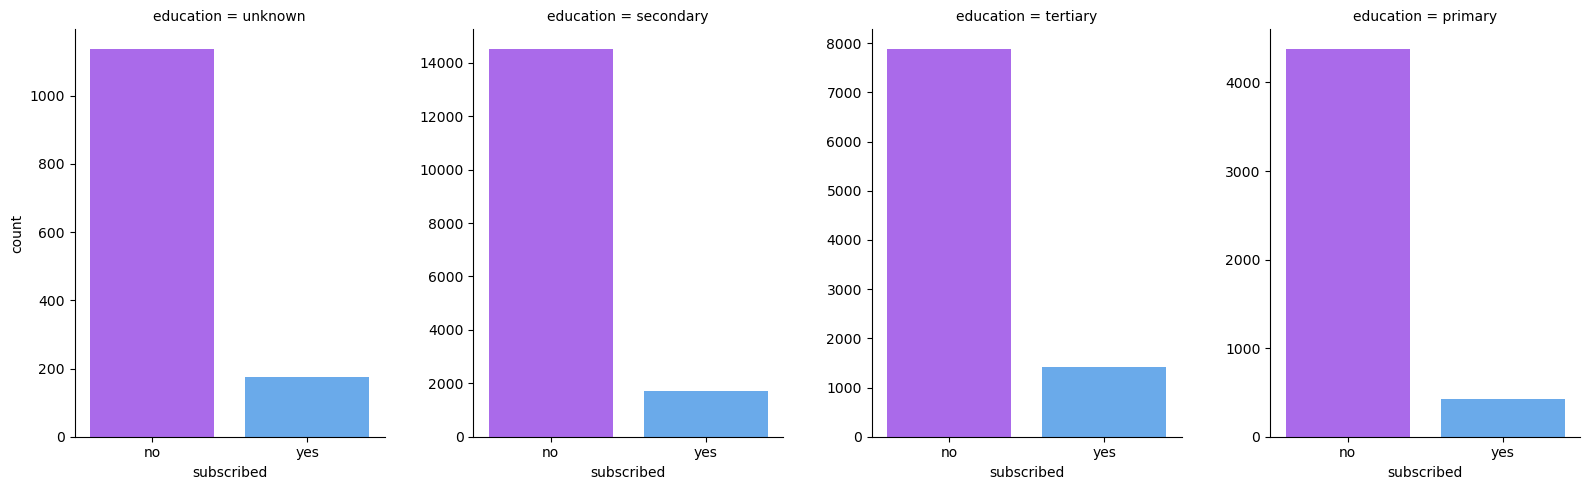

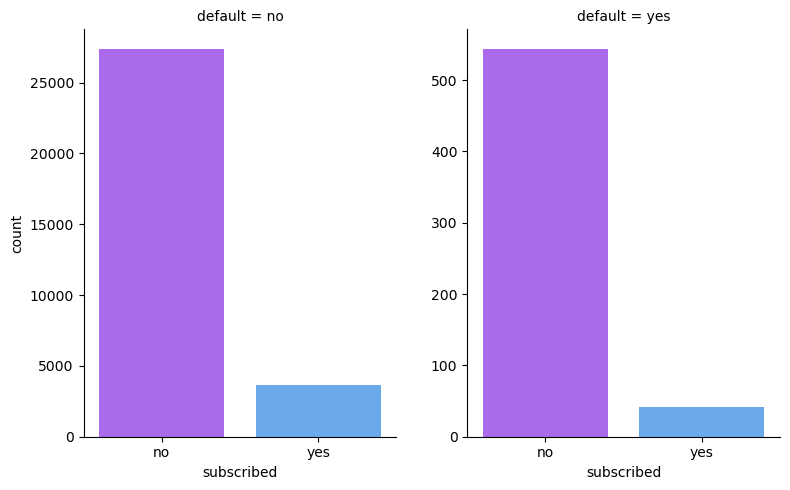

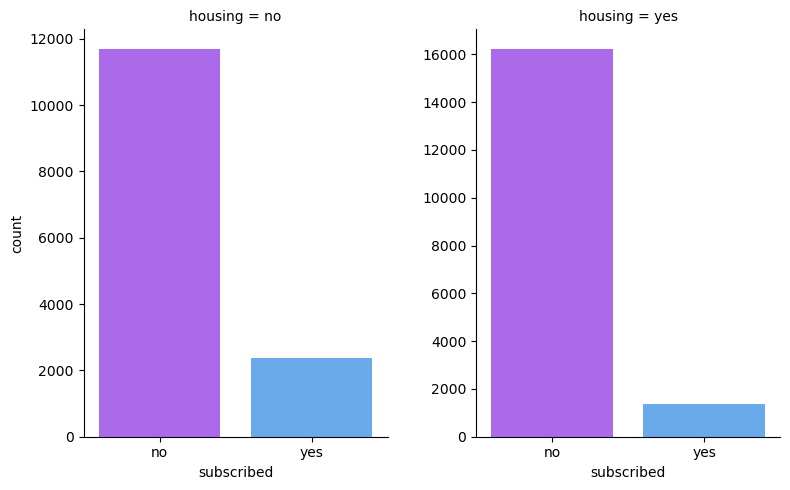

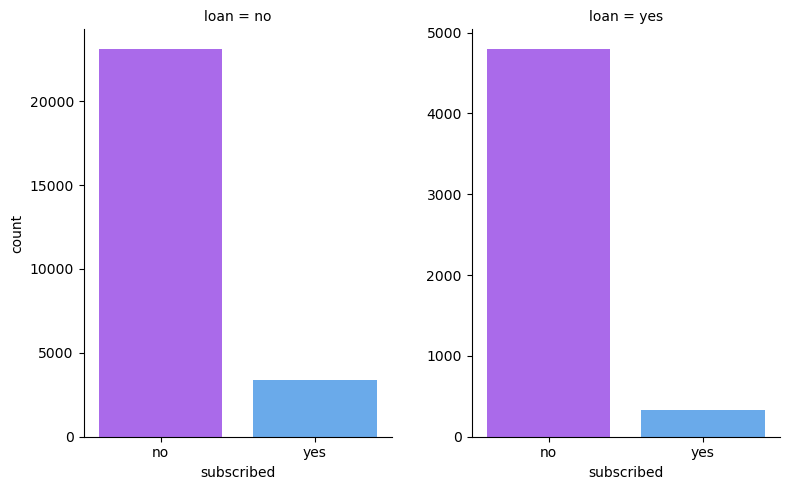

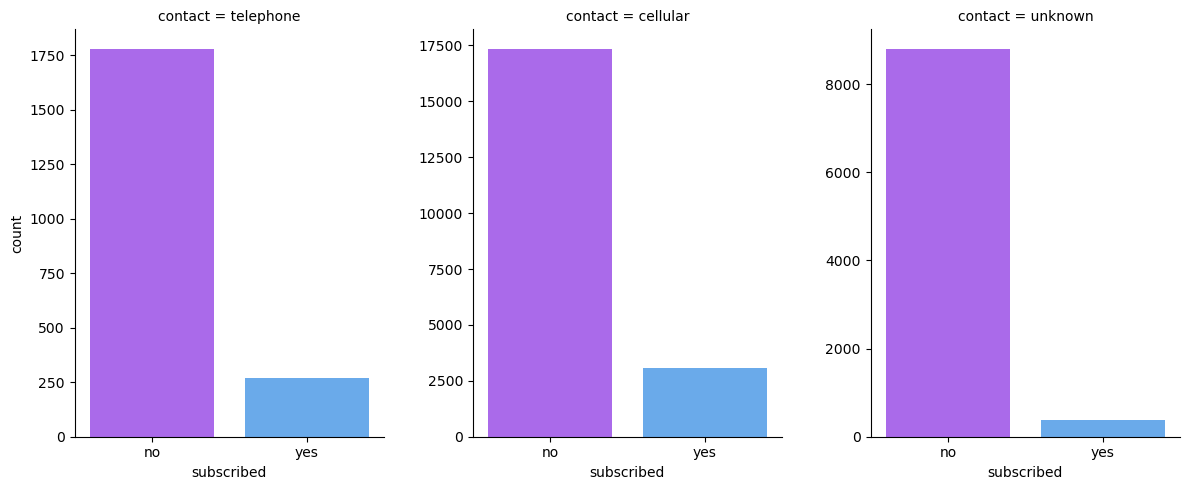

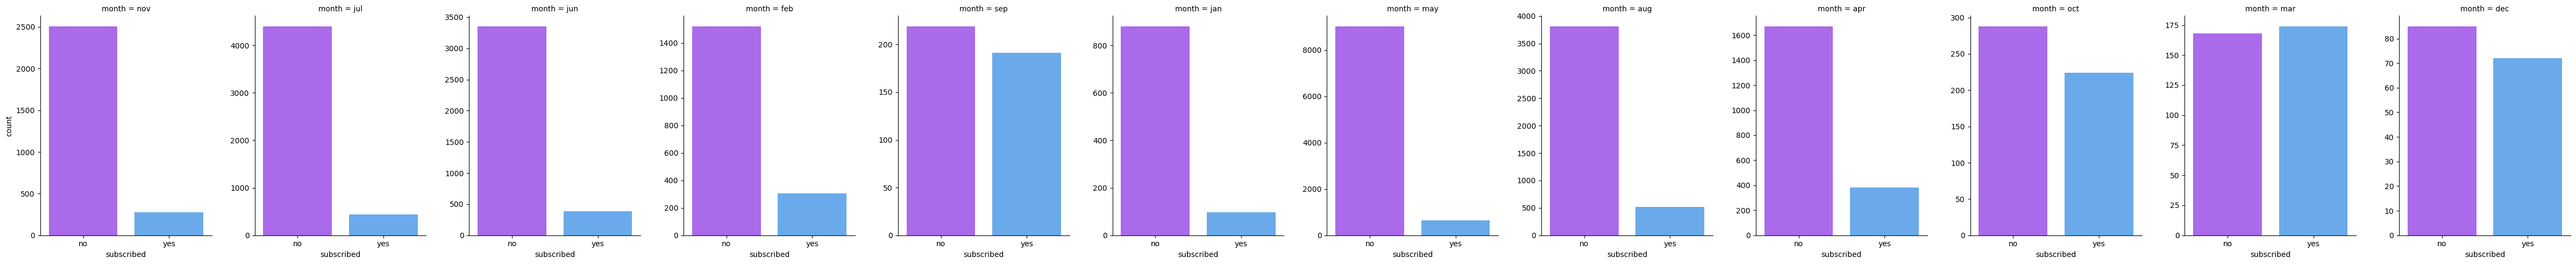

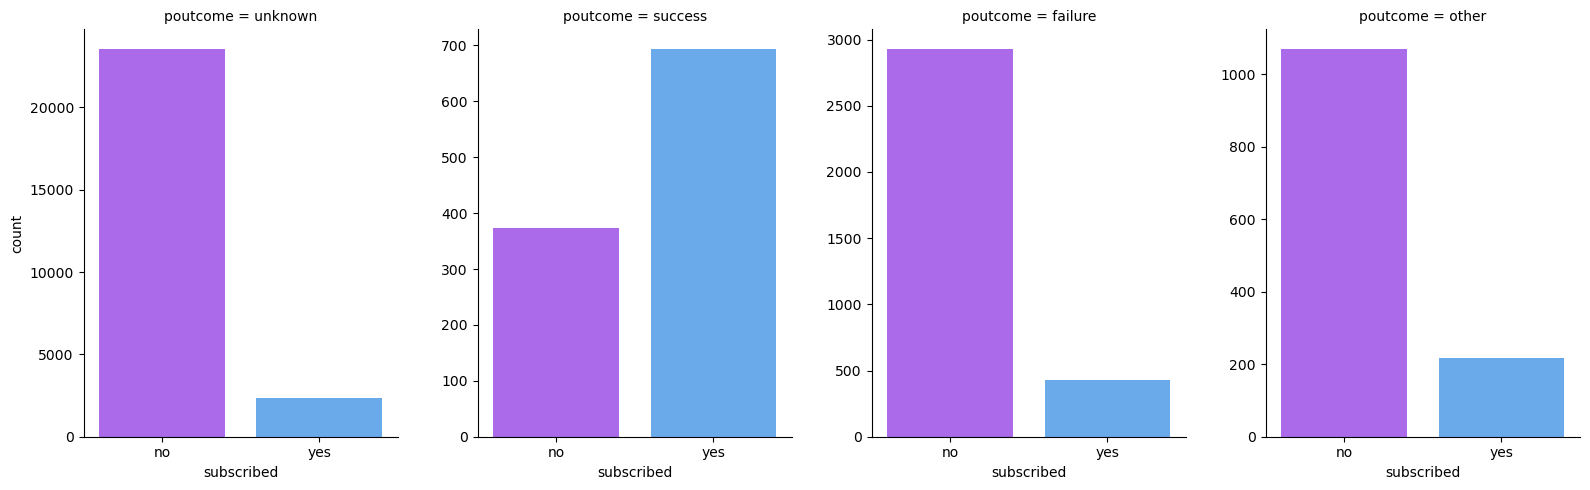

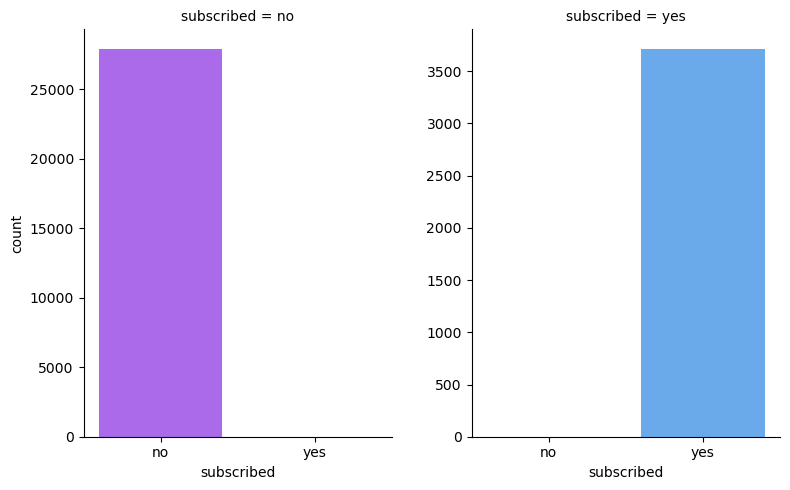

In [404]:
plt.figure(figsize=(15, 8))

for col in categorical_cols:
    sns.catplot(x='subscribed', col=col, kind='count', data=train_data, height=5, aspect=0.8, palette='cool_r', sharey=False)
plt.show()

**From the presented data and Bivariant visualization, we can make several observations:**

**Job:**
* The count of 'yes' subscriptions varies across job categories.
* Jobs such as 'management', 'technician', and 'admin.' have relatively higher 'yes' counts.
* Jobs like 'blue-collar', 'services', and 'unknown' have lower 'yes' counts.

**Marital:**
* 'Single' and 'divorced' individuals have a higher 'yes' subscription percentage compared to 'married' individuals.

**Education:**
* Individuals with 'tertiary' education have a higher 'yes' subscription percentage.
* 'Primary' education level has a lower 'yes' subscription percentage.

**Default:**
* Individuals with no default have a higher 'yes' subscription percentage.

**Housing and Loan:**
* Presence or absence of housing and loan doesn't show a clear trend in subscription percentages.

**Contact:**
* 'Cellular' contact has a higher 'yes' subscription percentage compared to 'telephone' and 'unknown' contact.

**Month:**
* Subscription percentages vary across months, with higher percentages in months like 'mar', 'dec', and 'sep'.

**Poutcome:**
* Individuals with a 'success' outcome from the previous campaign have a higher 'yes' subscription percentage.

**Overall:**

* The dataset is imbalanced, with a higher count of 'no' subscriptions (88.26% 'no', 11.74% 'yes').
* Jobs, marital status, education, default status, and contact type seem to have an impact on subscription percentages.

###### Univariant Analysis -----------numerical_cols

In [405]:
for col in numerical_cols:
    print(f"{'**'*15}\n{test_data[col].value_counts()}\n")

******************************
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64

******************************
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64

******************************
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Length: 4292, dtype: int64

******************************
20    843
18    696
17    595
6     584
21    581
7     577
14    565
8     561
28    554
5     537
19    529
29    504
15    495
12    487
13    486
30    484
11    465
9     464
16    434
4     429
2     393
3     318
27    317
23    282
26    274
22    265
25    254
31    183
10    164
24    142
1     102
Name: day, dtype: int64

******************************
91    

In [406]:
def format_bold(text):
    return f"\033[1m{text}\033[0m"  

for i in tqdm(numerical_cols):
    grouped_data = train_data.groupby(['subscribed', i]).size()
    #print(grouped_data)
    
    # Display counts for 'no' and 'yes' separately
    print(f"Counts for {i}:\n")
    
    # Print 'yes' counts 
    print(f"YES_subscribed : {format_bold(grouped_data.loc['yes'])}\n",  '\n')
    
    # Print 'no' counts 
    print(f"NO_subscribed : {format_bold(grouped_data.loc['no'])}\n", '-------' * 15)

    # Calculate total counts for 'no' and 'yes'
    total_no = grouped_data['no'].sum() if 'no' in grouped_data.index.levels[0] else 0
    total_yes = grouped_data['yes'].sum() if 'yes' in grouped_data.index.levels[0] else 0

    print(f"\nTotal 'no' count for {i}: {total_no}", '\n')
    print(f"Total 'yes' count for {i}: {total_yes}", '\n')

    # Calculate percentages
    total_count = total_no + total_yes
    percentage_no = (total_no / total_count) * 100 if total_count > 0 else 0
    percentage_yes = (total_yes / total_count) * 100 if total_count > 0 else 0

    print(f"\nPercentage of 'no' overall: {percentage_no:.2f}%", '\n')
    print(f"Percentage of 'yes' overall: {percentage_yes:.2f}%", '\n')
    
    print('\n' + '=' * 60 + '\n')

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 127.76it/s]

Counts for ID:

YES_subscribed : ID
88       1
130      1
271      1
389      1
447      1
        ..
45204    1
45205    1
45207    1
45208    1
45209    1
Length: 3715, dtype: int64
 

NO_subscribed : ID
2        1
3        1
4        1
5        1
6        1
        ..
45195    1
45199    1
45200    1
45210    1
45211    1
Length: 27932, dtype: int64
 ---------------------------------------------------------------------------------------------------------

Total 'no' count for ID: 27932 

Total 'yes' count for ID: 3715 


Percentage of 'no' overall: 88.26% 

Percentage of 'yes' overall: 11.74% 



Counts for age:

YES_subscribed : age
18     5
19     7
20    14
21    15
22    25
      ..
87     1
90     1
92     1
93     1
95     1
Length: 73, dtype: int64
 

NO_subscribed : age
18     3
19    15
20    25
21    33
22    61
      ..
86     5
87     1
88     2
89     2
94     1
Length: 72, dtype: int64
 -----------------------------------------------------------------------------------

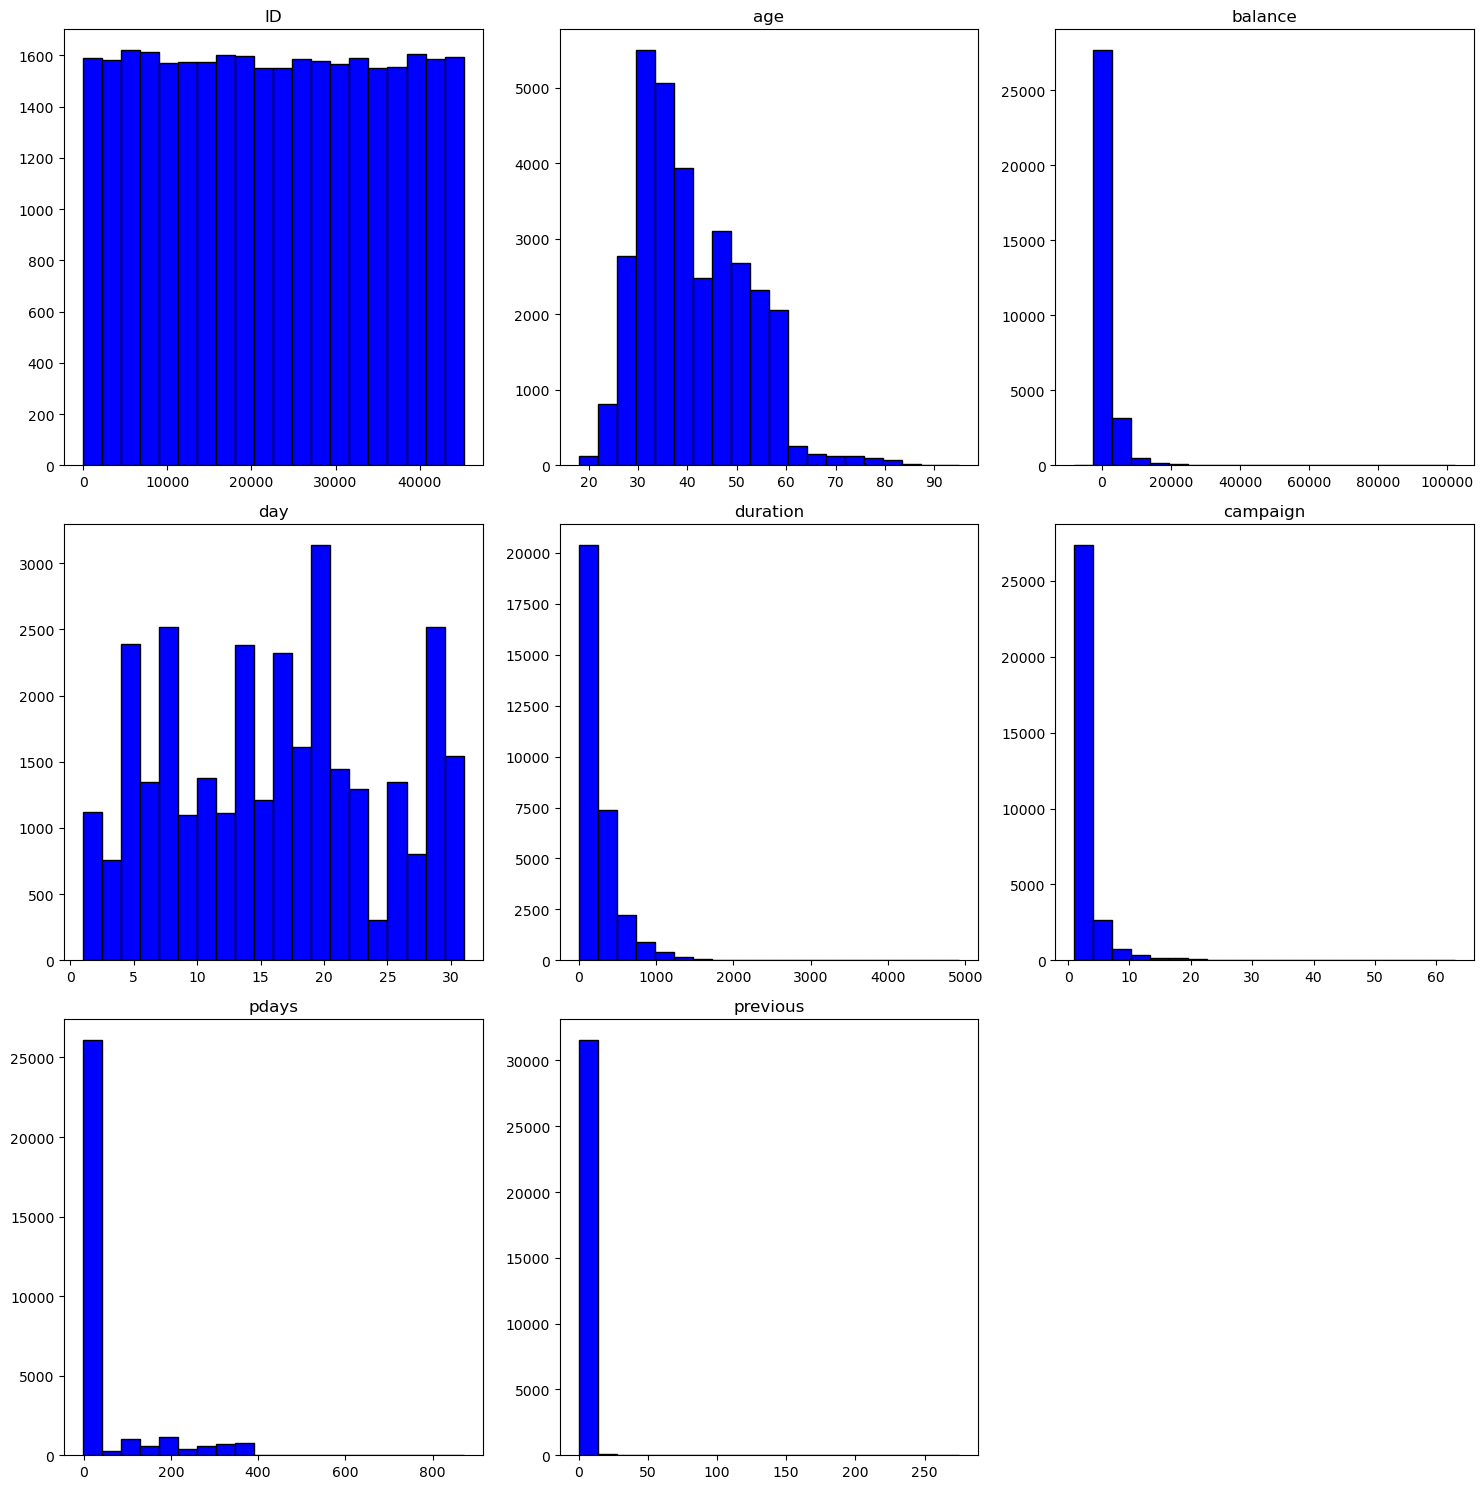

In [407]:
train_data[numerical_cols].hist(bins=20, edgecolor="black", figsize=(15,15), color="blue", grid=False)
plt.tight_layout()
plt.show()

* Looking at the graph above, it's noticeable that none of the plotted distributions forms a perfect bell-shaped structure.

**ID Column:** Unique identifier with a count of 1 for each ID; no repeated values.
    
**Age Column:** Broad age distribution (18 to 95); most entries in the 20 to 40 age range.

**Balance Column:** Presence of negative values, requiring investigation; wide balance range with a significant number at 0.
    
**Day Column:** Represents the day of the month; no clear patterns, but an even distribution is observed.

**Duration Column:** Duration of the last contact with clients; majority with shorter durations, but some longer durations exist.

**Campaign Column:** Represents the number of contacts during this campaign; most clients contacted 1 or 2 times.

**Pdays Column:** Number of days since the client was last contacted; a large portion (-1) indicates no previous approach.

**Previous Column:** Number of contacts before this campaign; a substantial number of clients not contacted before (0).

###### Bivariant analysis

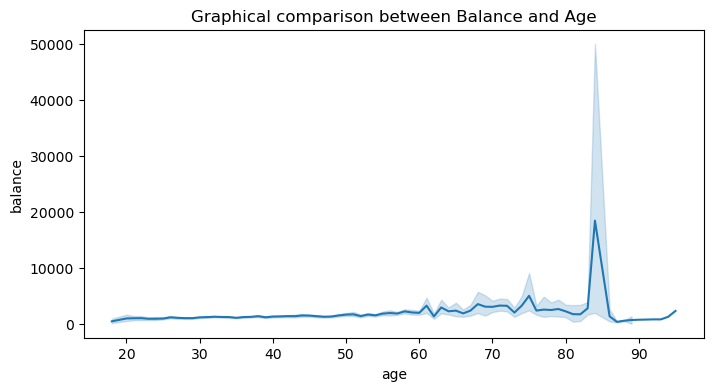

In [408]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='age', y='balance', data=train_data)
plt.title('Graphical comparison between Balance and Age')
plt.show()

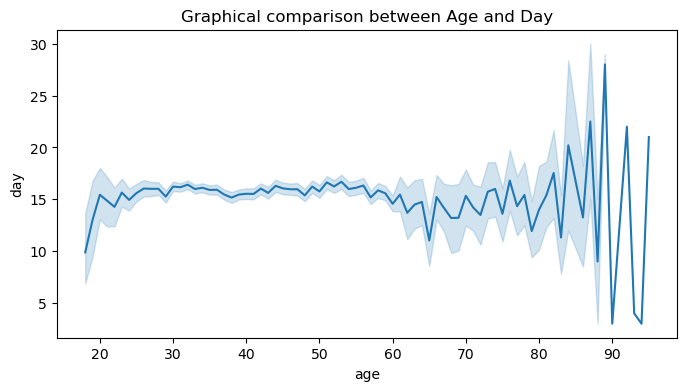

In [409]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='age', y='day', data=train_data)
plt.title('Graphical comparison between Age and Day')
plt.show()

**In both charts, an increase in age corresponds to an increase in both day and balance.**

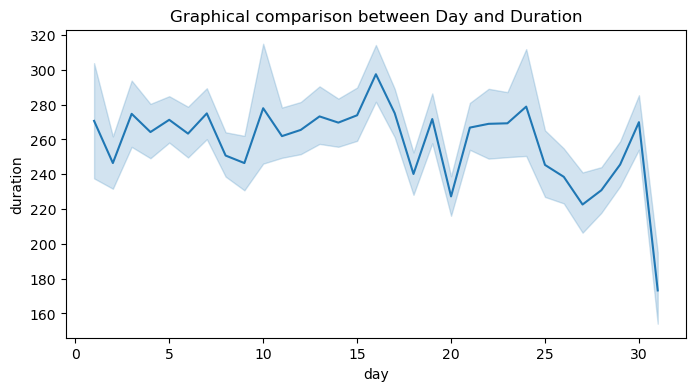

In [410]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='day', y='duration', data=train_data)
plt.title('Graphical comparison between Day and Duration')
plt.show()

**As the duration increases, there is a slight reduction in the day.**

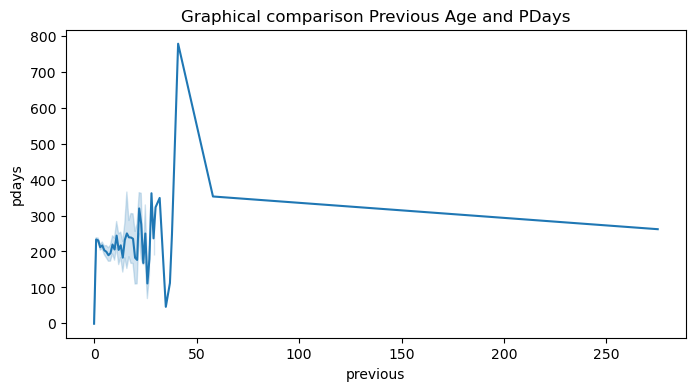

In [411]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='previous', y='pdays', data=train_data)
plt.title('Graphical comparison Previous Age and PDays')
plt.show()

**A positive correlation might indicate that an increase in the number of days since the last contact is linked to a higher count of previous contacts**

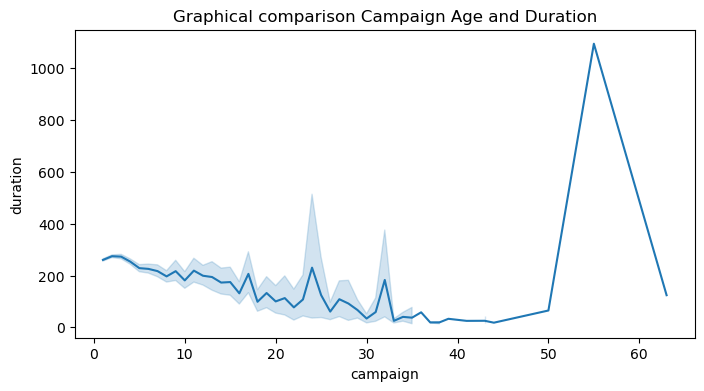

In [412]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='campaign', y='duration', data=train_data)
plt.title('Graphical comparison Campaign Age and Duration')
plt.show()

**Extended call durations could be linked to a lower number of campaigns.**

### For test_dataset

In [413]:
for col in categorical_col:
    print(f"{'**'*15}\n{test_data[col].value_counts()}\n")

******************************
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

******************************
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

******************************
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

******************************
no     13334
yes      230
Name: default, dtype: int64

******************************
yes    7546
no     6018
Name: housing, dtype: int64

******************************
no     11451
yes     2113
Name: loan, dtype: int64

******************************
cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64

******************************
may    4097
jul    2051
aug    1914
j

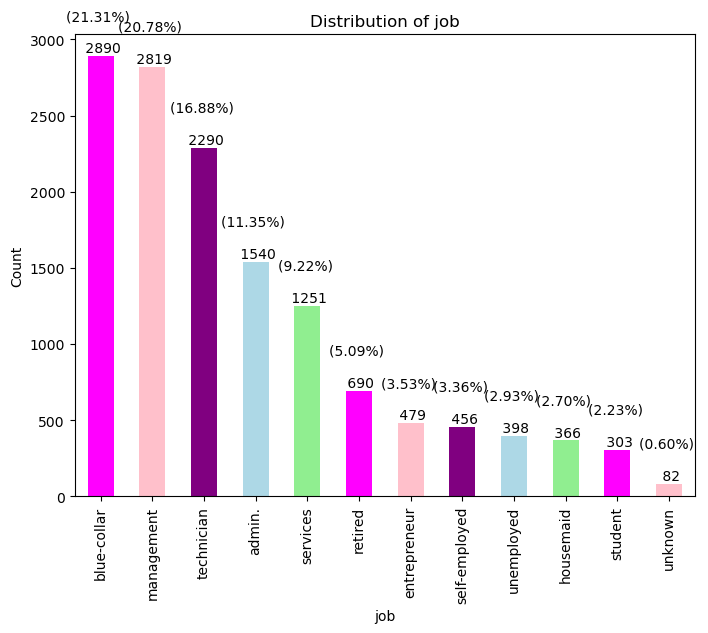

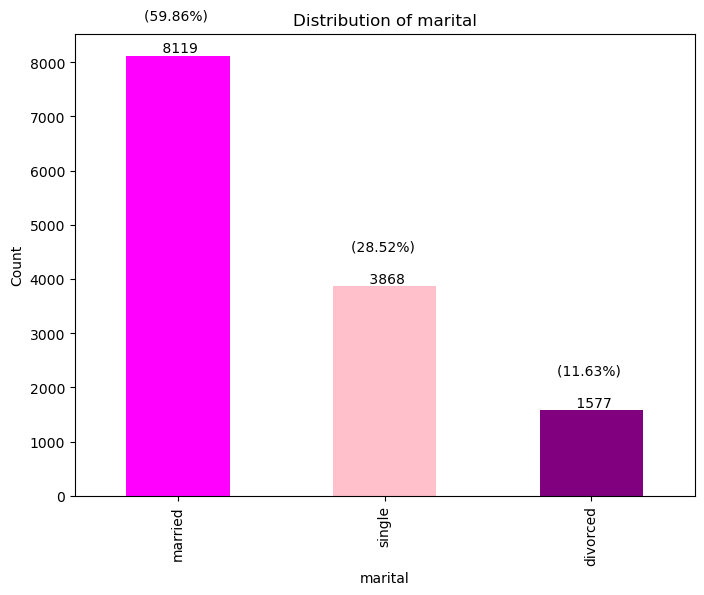

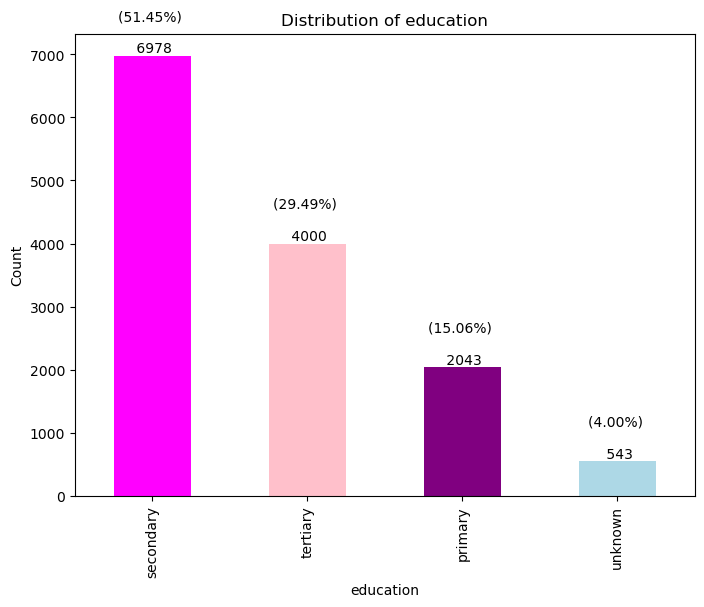

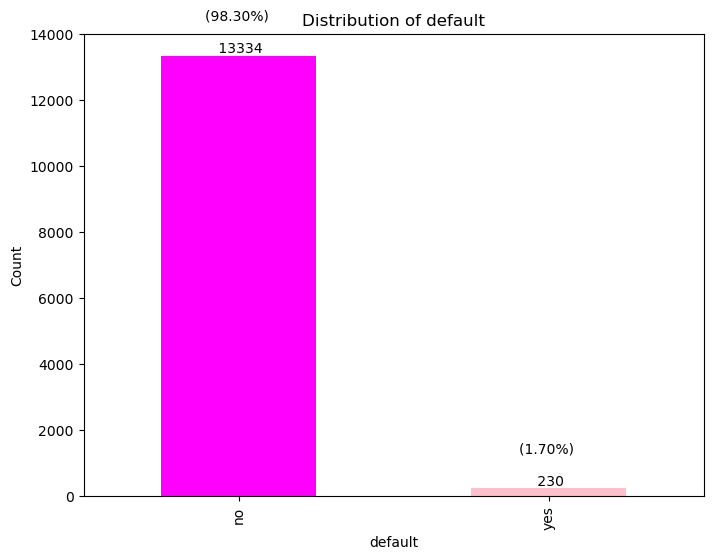

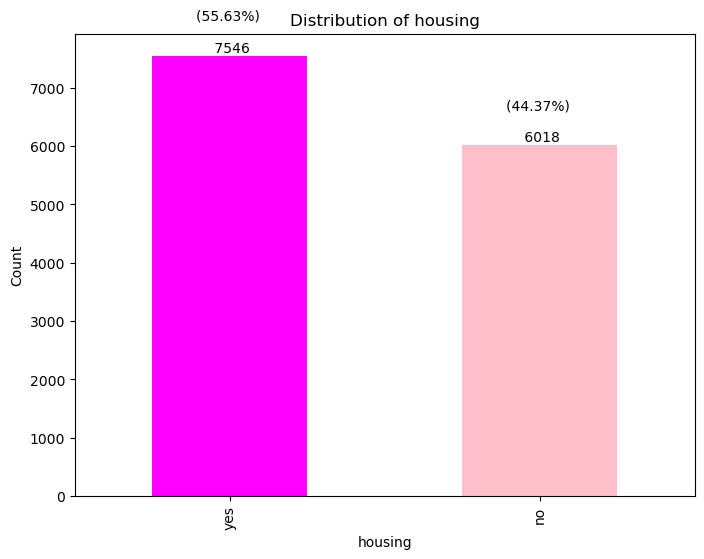

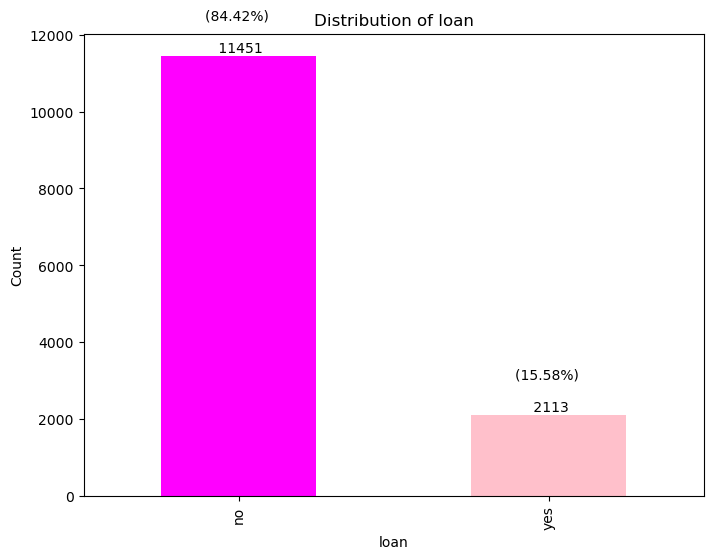

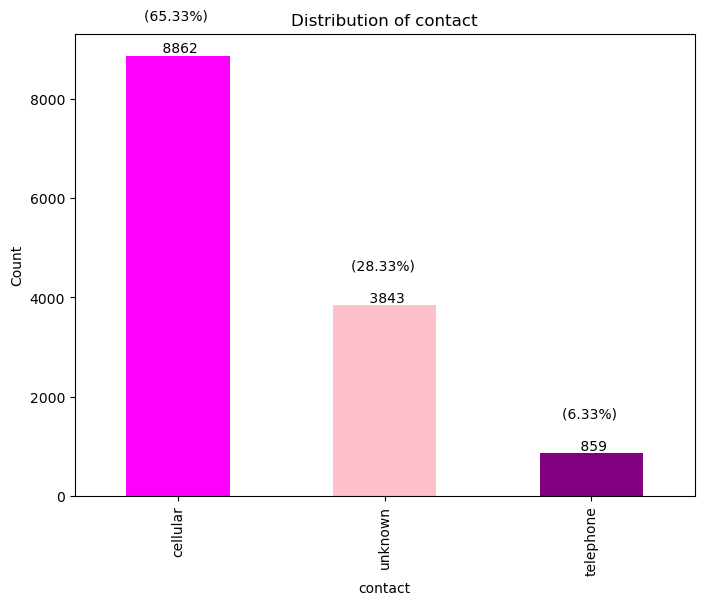

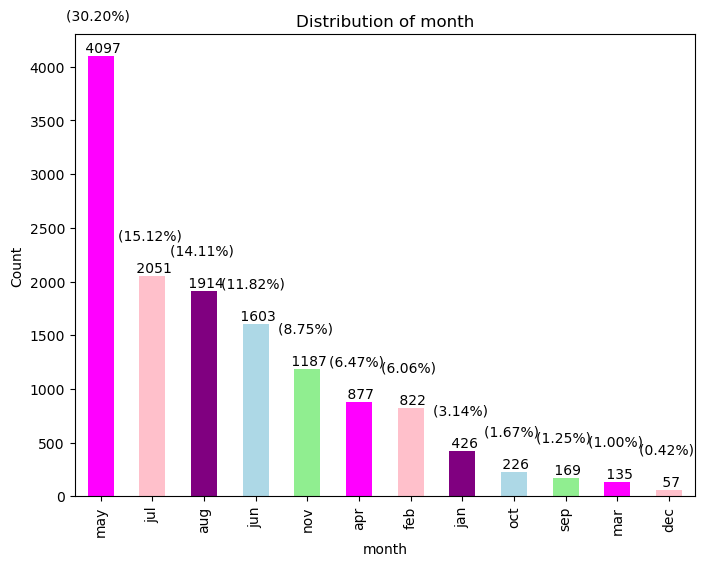

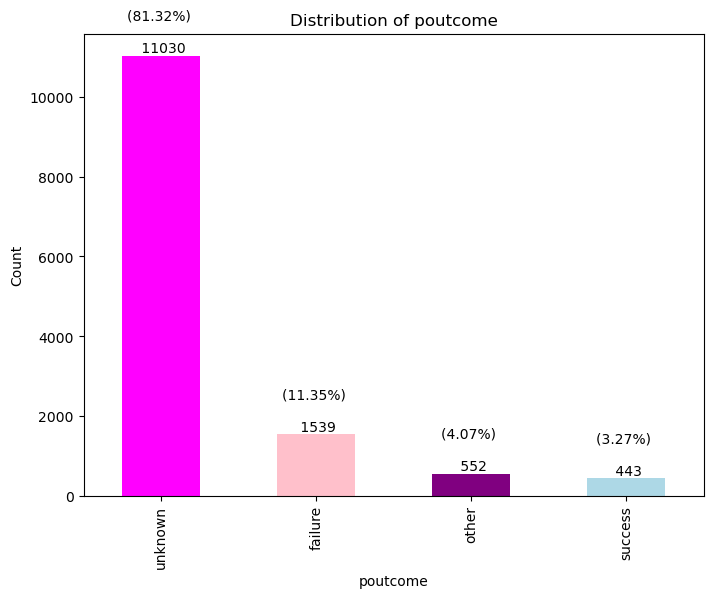

In [414]:
for column in categorical_col:
    plt.figure(figsize=(8, 6))
    value_counts = test_data[column].value_counts()
    total_count = len(test_data[column])

    ax = value_counts.plot(kind='bar', color=['magenta', 'pink', 'purple', 'lightblue', 'lightgreen'])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    for i, count in enumerate(value_counts):
        percentage = count / total_count * 100
        combined_text = f'({percentage:.2f}%) \n\n {count}'
        plt.text(i, count + 5, combined_text, ha='center', va='bottom')

    plt.show()

**Job** : The 'job' column categorizes individuals' occupations into 12 unique job types, with 'blue-collar' being the most common, comprising 2,890 individuals, representing the highest percentage at 21.31.

**Marital** : The column labeled 'marital' indicates the marital status of individuals, with three distinct categories. The most prevalent status is 'married,' occurring 8,119 times, representing the highest percentage at 59.86.

**education** : The 'education' column categorizes individuals into four unique education levels. The most common is 'Secondary,' with 6,978 individuals having this education, representing the highest percentage at 51.45.

**default** : The 'default' column probably signifies whether individuals have defaulted on credit, with two unique values: 'no' and 'yes.' The majority, totaling 13,334 individuals, do not have credit in default, representing the highest percentage at 98.30.

**housing** : The 'housing' column potentially reflects whether individuals have housing loans, with two distinct values: 'no' and 'yes.' The prevalent situation is that 7,546 individuals have housing loans, representing the highest percentage at 55.63.

**loan** : The 'loan' column indicates the presence of personal loans for individuals, with two unique values: 'no' and 'yes.' The majority, totaling 11,451 individuals, do not possess personal loans, representing the highest percentage at 84.42. 

**contact** : The 'contact' column potentially signifies the communication method, with three unique options: 'cellular,' 'telephone,' and 'unknown.' The prevailing contact method is 'cellular,' observed in 8,862 individuals, representing the highest percentage at 65.33.

**month** : The 'month' column denotes the month when contacts were initiated, featuring 12 unique months. The most commonly utilized contact month is 'May,' recorded for 4,097 individuals, representing the highest percentage at 30.20.

**poutcome** : The 'poutcome' column could indicate the result of a prior marketing campaign, encompassing four unique outcomes: 'unknown,' 'failure,' 'other,' and 'success.' The prevalent outcome is 'unknown,' observed in 11,030 individuals, representing the highest percentage at 81.32.

**The categorical variables graphs show a progressive decrease from left to right, and they include percentage values that provide insights into the quantity differences, facilitating a better understanding of the importance of each quantity.**

In [415]:
for col in test_data.select_dtypes(include='object').columns:
    print(col,':')
    unique_values = test_data[col].unique()
    print('Length of unique value: ',len(unique_values), unique_values)
    print('----'*5)

job :
Length of unique value:  12 ['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown']
--------------------
marital :
Length of unique value:  3 ['married' 'divorced' 'single']
--------------------
education :
Length of unique value:  4 ['secondary' 'primary' 'tertiary' 'unknown']
--------------------
default :
Length of unique value:  2 ['no' 'yes']
--------------------
housing :
Length of unique value:  2 ['yes' 'no']
--------------------
loan :
Length of unique value:  2 ['no' 'yes']
--------------------
contact :
Length of unique value:  3 ['cellular' 'telephone' 'unknown']
--------------------
month :
Length of unique value:  12 ['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct']
--------------------
poutcome :
Length of unique value:  4 ['unknown' 'failure' 'other' 'success']
--------------------


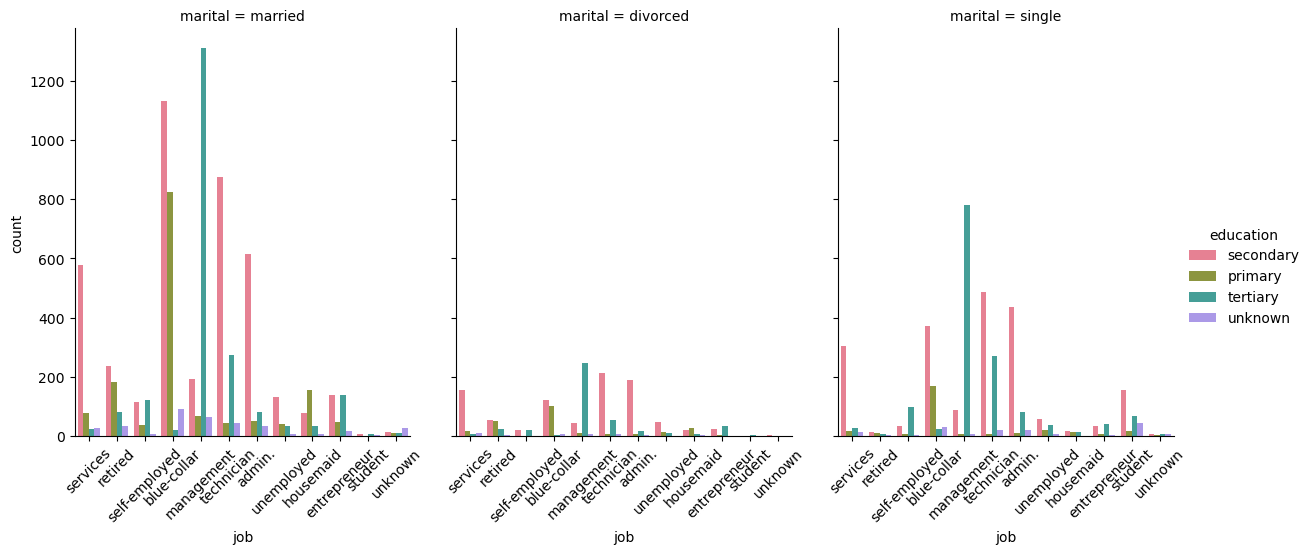

In [416]:
plot = sns.catplot(x='job', col='marital', hue='education', kind='count', data=test_data, height=5, aspect=0.8, palette='husl')

# Rotate x-axis labels for all facets
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

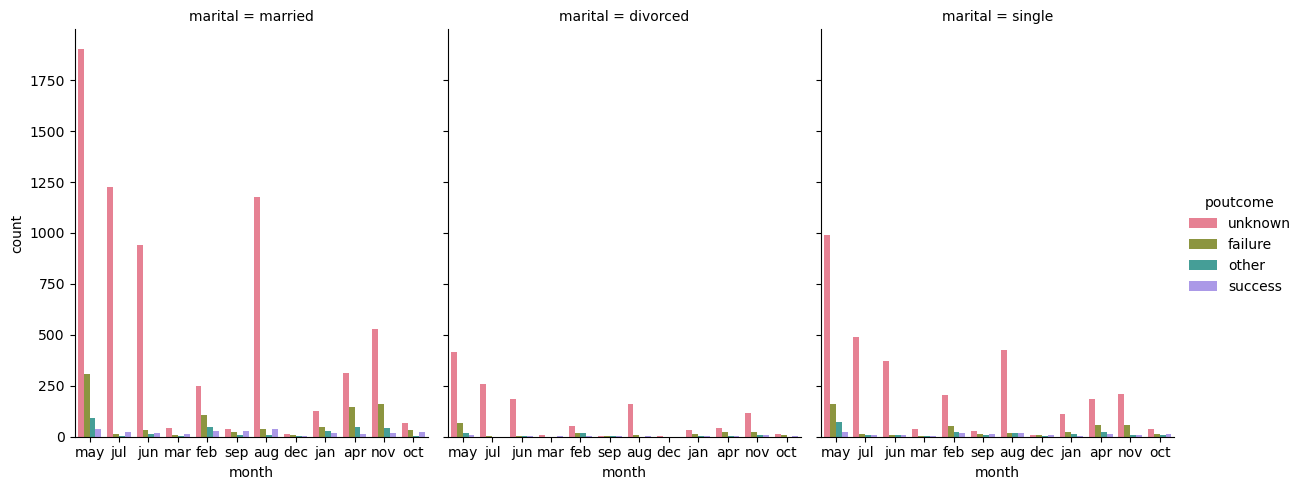

In [417]:
plt.figure(figsize=(10, 6))
sns.catplot(x='month',col='marital', hue='poutcome', kind='count', data=test_data, height=5, aspect=0.8, palette='husl')
plt.show()

<Figure size 1500x800 with 0 Axes>

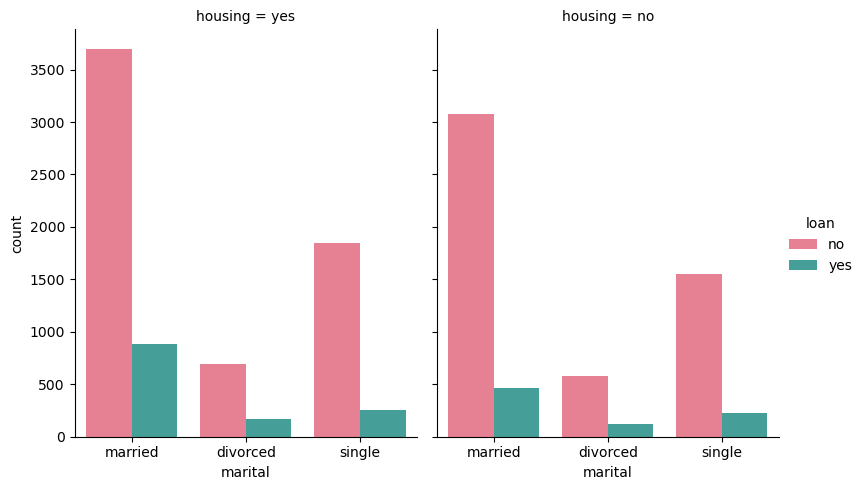

In [418]:
plt.figure(figsize=(15, 8))
sns.catplot(x='marital', col='housing', hue='loan', kind='count', data=test_data, height=5, aspect=0.8, palette='husl')
plt.show()

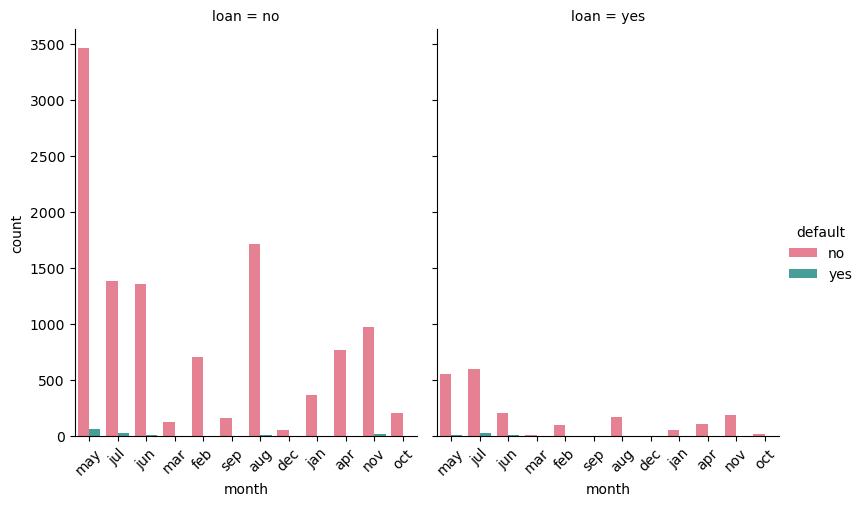

In [419]:
plot = sns.catplot(x='month', col='loan', hue='default', kind='count', data=test_data, height=5, aspect=0.8, palette='husl')

# Rotate x-axis labels for all facets
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

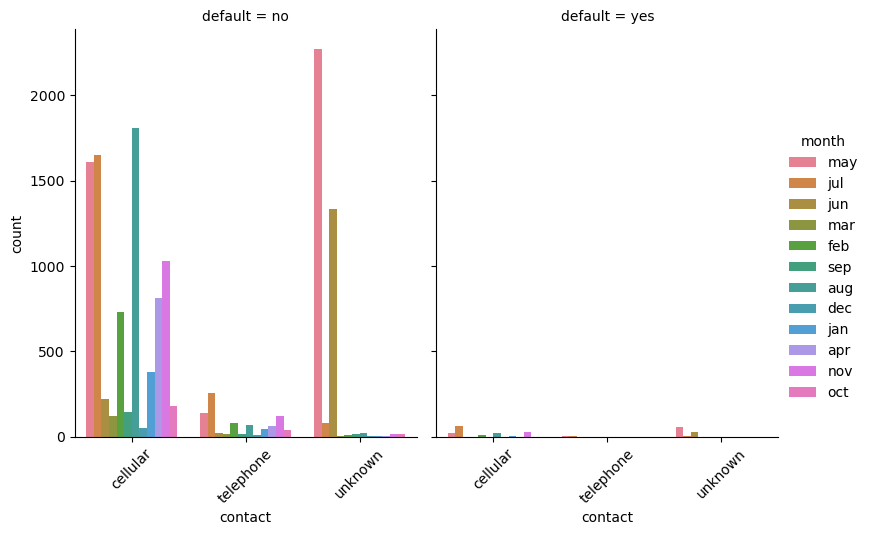

In [420]:
plot = sns.catplot(x='contact', col='default', hue='month', kind='count', data=test_data, height=5, aspect=0.8, palette='husl')

# Rotate x-axis labels for all facets
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

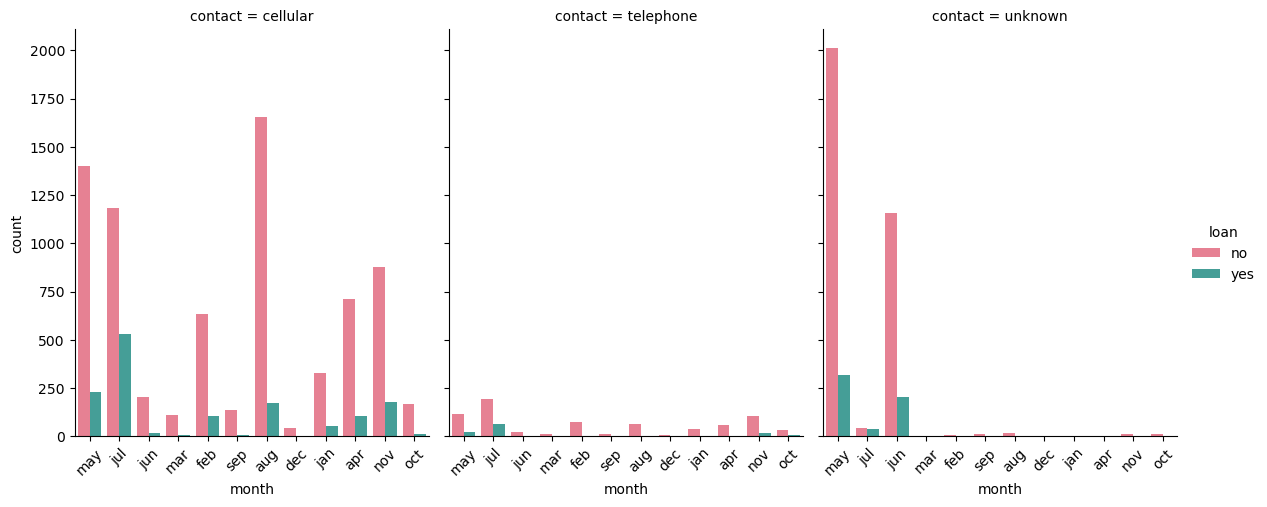

In [421]:
plot = sns.catplot(x='month', col='contact', hue='loan', kind='count', data=test_data, height=5, aspect=0.8, palette='husl')

# Rotate x-axis labels for all facets
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

In [422]:
for col in numerical_col:
    print(f"{'**'*15}\n{test_data[col].value_counts()}\n")

******************************
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64

******************************
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64

******************************
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Length: 4292, dtype: int64

******************************
20    843
18    696
17    595
6     584
21    581
7     577
14    565
8     561
28    554
5     537
19    529
29    504
15    495
12    487
13    486
30    484
11    465
9     464
16    434
4     429
2     393
3     318
27    317
23    282
26    274
22    265
25    254
31    183
10    164
24    142
1     102
Name: day, dtype: int64

******************************
91    

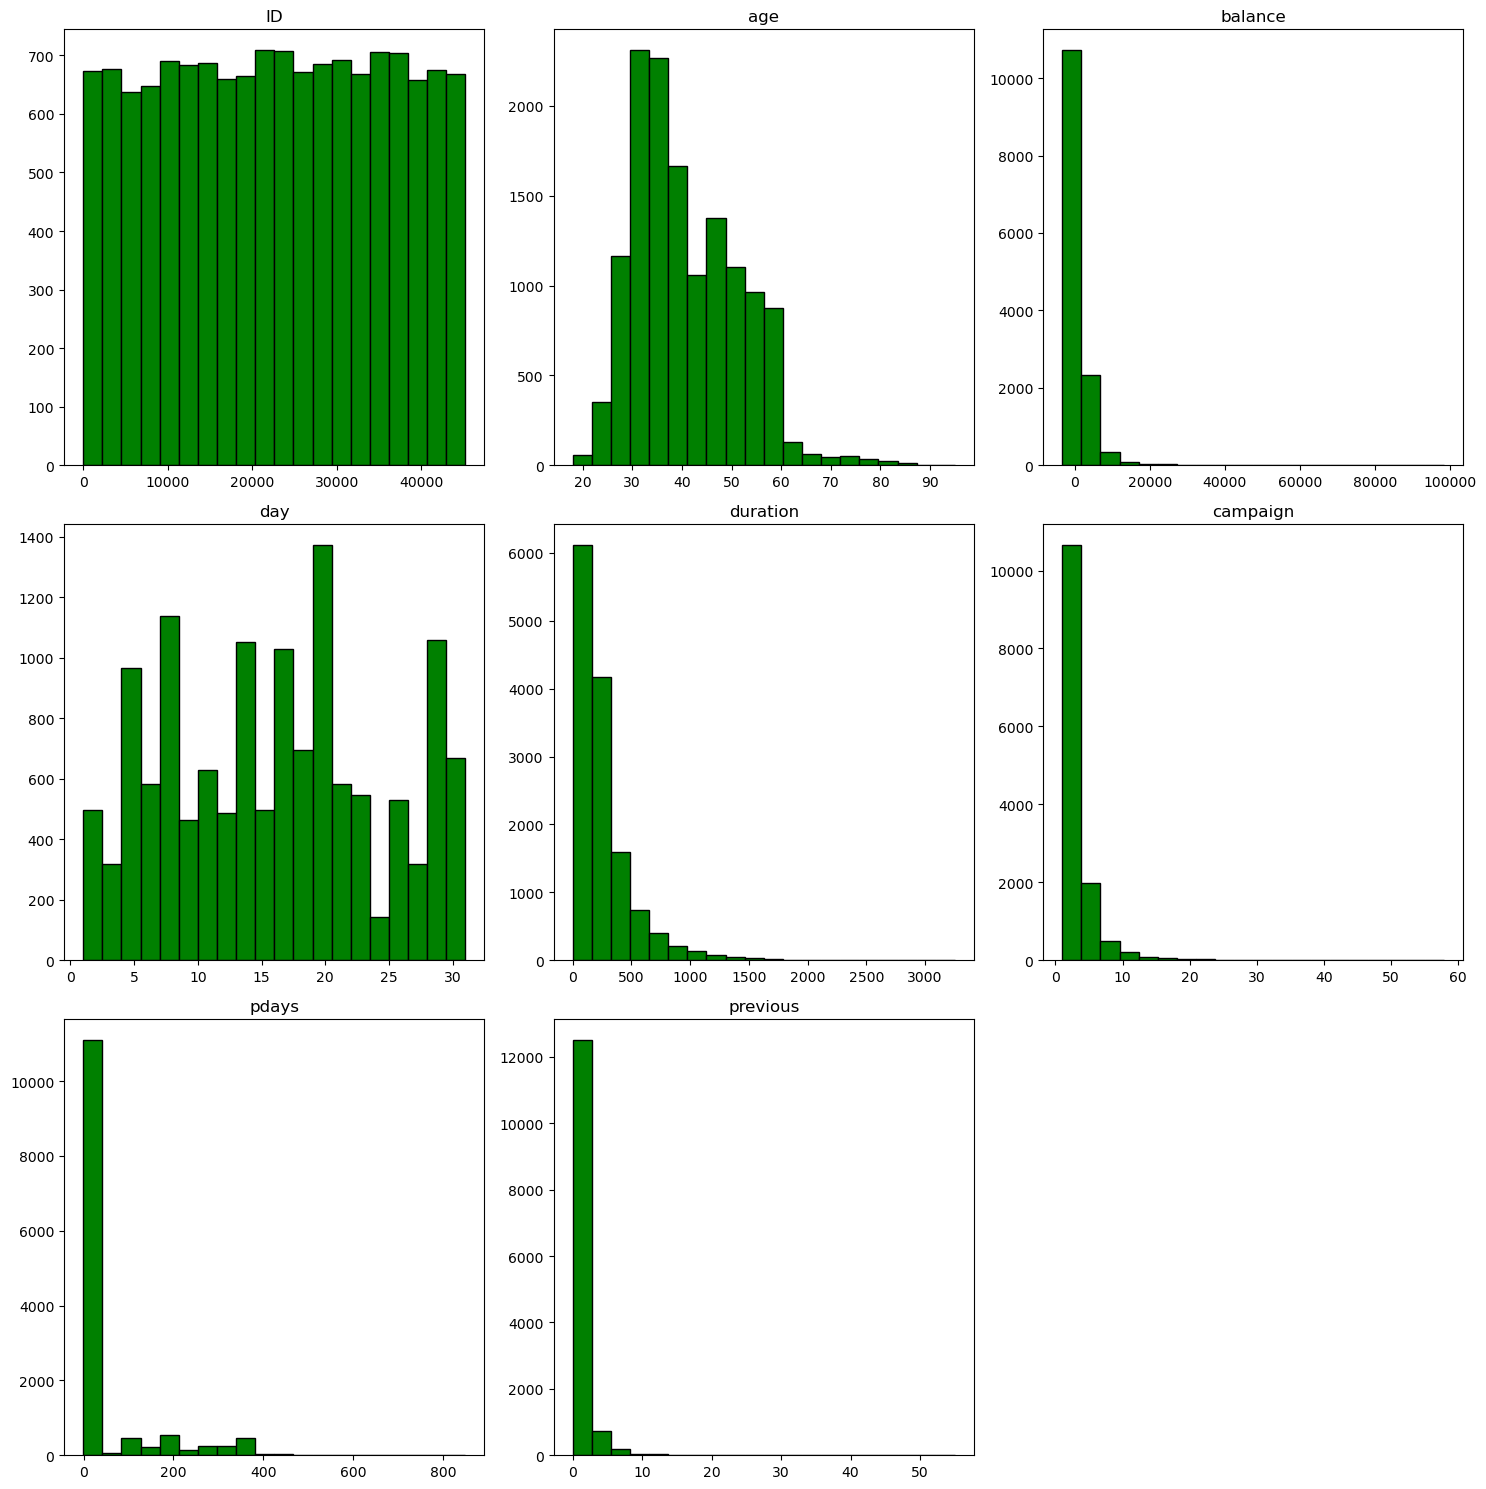

In [423]:
test_data[numerical_col].hist(bins=20, edgecolor="black", figsize=(15,15), color="green", grid=False)
plt.tight_layout()
plt.show()

* Looking at the graph above, it's noticeable that none of the plotted distributions forms a perfect bell-shaped structure.

**ID Column:** Unique identifier with a count of 1 for each ID; no repeated values.
    
**Age Column:** Broad age distribution (18 to 95); most entries in the 20 to 40 age range.

**Balance Column:** Presence of negative values, requiring investigation; wide balance range with a significant number at 0.
    
**Day Column:** Represents the day of the month; no clear patterns, but an even distribution is observed.

**Duration Column:** Duration of the last contact with clients; majority with shorter durations, but some longer durations exist.

**Campaign Column:** Represents the number of contacts during this campaign; most clients contacted 1 or 2 times.

**Pdays Column:** Number of days since the client was last contacted; a large portion (-1) indicates no previous approach.

**Previous Column:** Number of contacts before this campaign; a substantial number of clients not contacted before (0).

#### Examination and Handling of Outliers

###### For Train_dataset

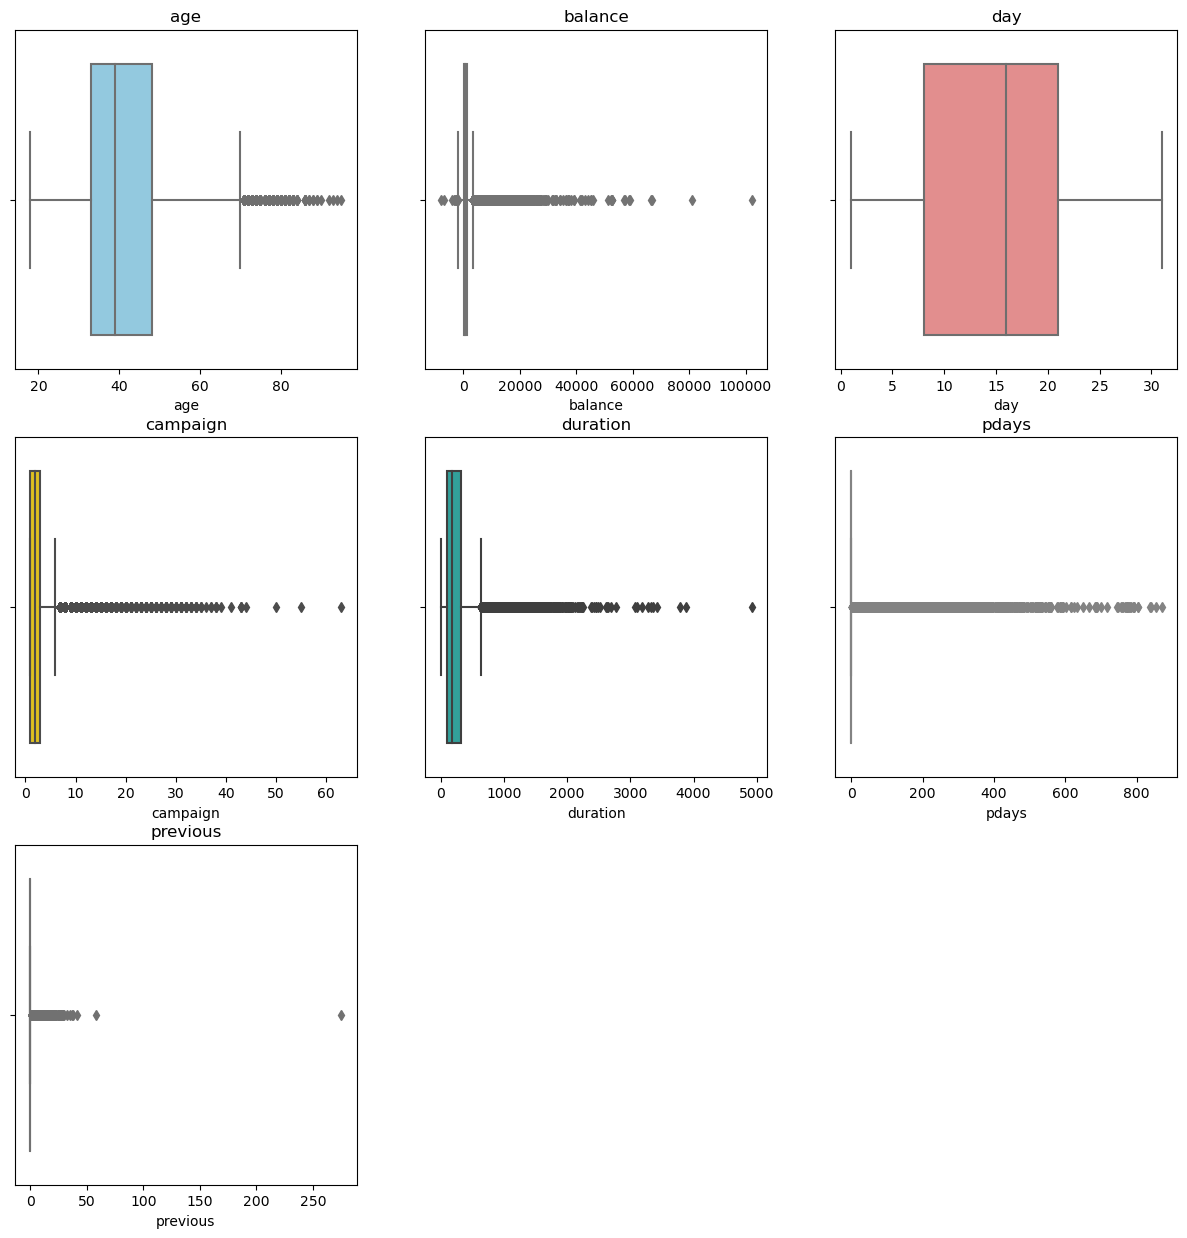

In [424]:
plt.figure(figsize=(15, 15))

selected_columns = ['age', 'balance', 'day', 'campaign', 'duration', 'pdays', 'previous']

# Define a list of colors
boxplot_colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightseagreen', 'lightpink', 'lightsalmon']

for index, (column, color) in enumerate(zip(selected_columns, boxplot_colors), 1):
    plt.subplot(3, 3, index)
    
    sns.boxplot(x=train_data[column], palette=[color])
    plt.title(column)

plt.show()

###### Managing outliers through Z-score

In [425]:
from scipy.stats import zscore

z = np.abs(zscore(train_data[selected_columns]))
display(z.head())

threshold = 3

train_new = train_data[(z<3).all(axis=1)]
display(train_new.head())

# Checking shape of old and new DataSet
print("Old DataFrame: ",train_data.shape[0])
print("New DataFrame: ",train_new.shape[0])
print('----'*15)
#Data loss percentage after using Zscore
data_loss_percentage= ((train_data.shape[0]-train_new.shape[0])/train_data.shape[0])*100
print("Data loss Percentage: {:.2f}".format(data_loss_percentage))

,age,balance,day,campaign,duration,pdays,previous
0,1.415793,0.187933,0.379579,0.245906,0.832754,0.408555,0.237059
1,0.937156,0.449397,0.499526,0.245906,0.649957,0.408555,0.237059
2,1.313627,0.156159,0.259631,0.567059,0.070449,0.408555,0.237059
3,1.509911,0.635055,0.739422,0.567059,2.368149,0.447299,1.001336
4,0.937156,0.411091,1.419637,0.567059,0.474054,0.408555,0.237059


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subscribed_binary
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,0


Old DataFrame:  31647
New DataFrame:  28124
------------------------------------------------------------
Data loss Percentage: 11.13


In [426]:
# Verifying using the Interquartile Range (IQR) approach.
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on IQR
train_IQR = train_data[~((train_data < lower_bound) | (train_data > upper_bound)).any(axis=1)]

# Calculate data loss percentage
data_loss_percentage = ((train_data.shape[0] - train_IQR.shape[0]) / train_data.shape[0]) * 100

print("Data Loss Percentage After removing Outliers with IQR method:", data_loss_percentage)

Data Loss Percentage After removing Outliers with IQR method: 40.99598698138844


###### For Test_dataset

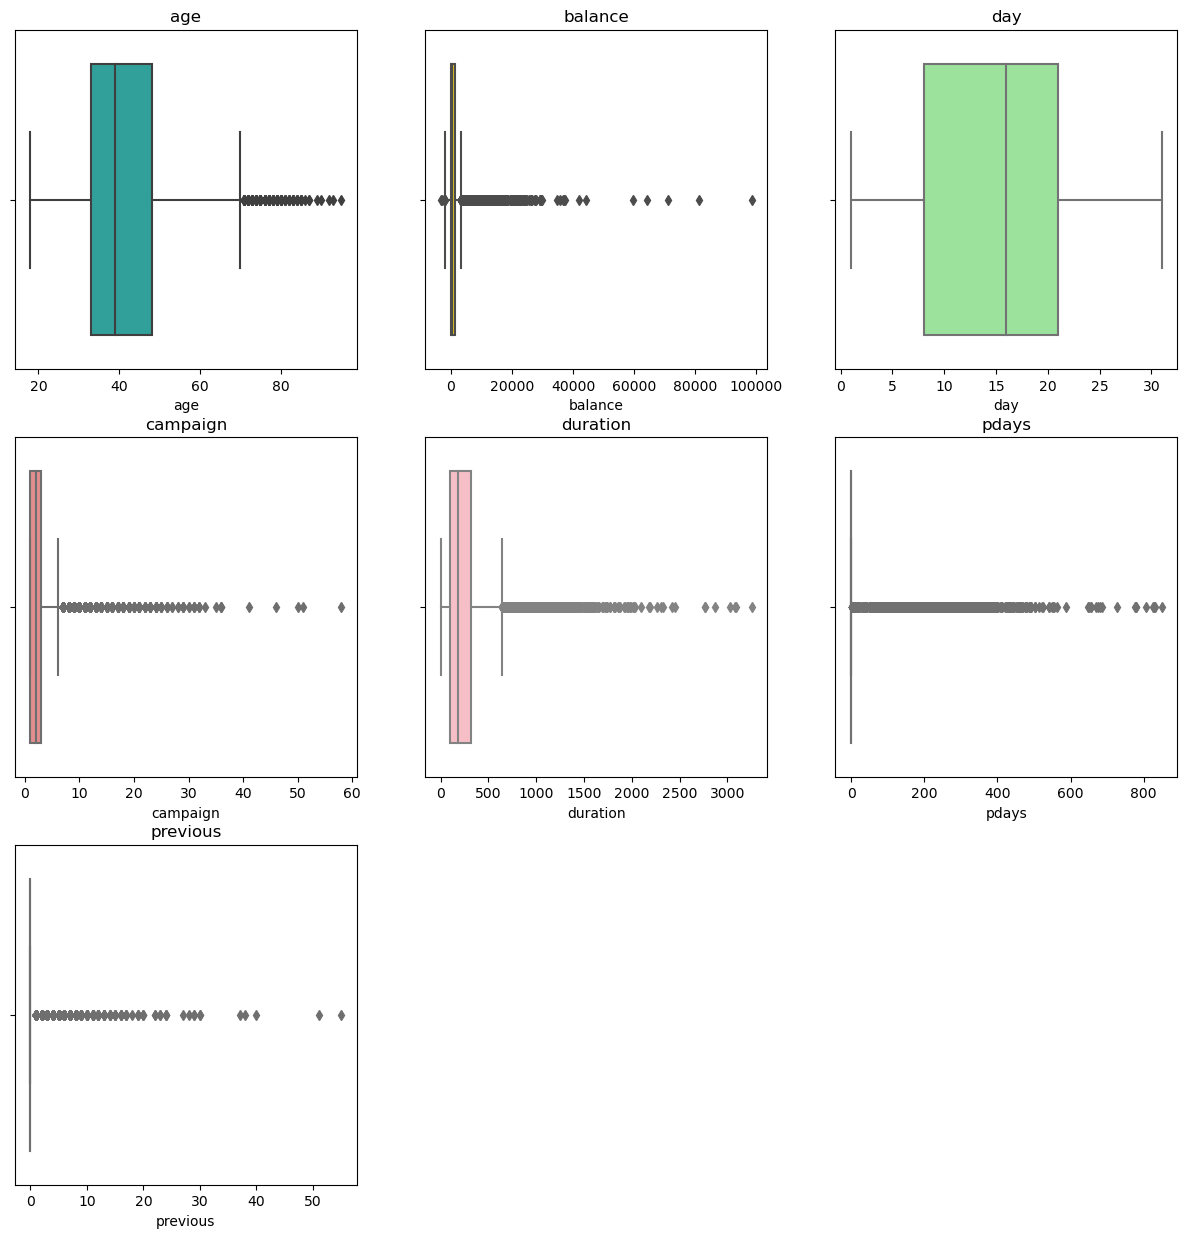

In [427]:
plt.figure(figsize=(15, 15))

selected_column = ['age', 'balance', 'day', 'campaign', 'duration', 'pdays', 'previous']

# Define a list of colors
boxplot_colors = [ 'lightseagreen', 'gold', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon','skyblue']

for index, (column, color) in enumerate(zip(selected_columns, boxplot_colors), 1):
    plt.subplot(3, 3, index)
    
    sns.boxplot(x=test_data[column], palette=[color])
    plt.title(column)

plt.show()

In [428]:
z1 = np.abs(zscore(test_data[selected_column]))
display(z1.head())

threshold = 3

test_new = test_data[(z<3).all(axis=1)]
display(test_new.head())

# Checking shape of old and new DataSet
print("Old DataFrame: ",test_data.shape[0])
print("New DataFrame: ",test_new.shape[0])
print('----'*15)
#Data loss percentage after using Zscore
data_loss_percentage= ((test_data.shape[0]-test_new.shape[0])/test_data.shape[0])*100
print("Data loss Percentage: {:.2f}".format(data_loss_percentage))

,age,balance,day,campaign,duration,pdays,previous
0,0.838114,0.402389,0.089124,1.058702,0.921849,0.418199,0.2975
1,3.499987,0.463375,1.778340,0.574850,0.439963,0.418199,0.2975
2,0.932421,0.393955,0.031534,0.574850,1.616074,0.418199,0.2975
3,1.519549,0.784508,0.330440,0.248140,0.747754,0.418199,0.2975
4,0.387871,0.669352,1.537023,0.574850,0.569789,0.418199,0.2975


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Old DataFrame:  13564
New DataFrame:  12055
------------------------------------------------------------
Data loss Percentage: 11.13


###### For updataed_ train_dataset

In [429]:
train_data = train_new
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subscribed_binary
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,0


###### For updataed_test_dataset

In [430]:
test_data = test_new
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [ ]:
test_data.skew()

###### For Train_dataset

In [431]:
#Transforming a categorical column into a numeric format.

# Convert 'yes' and 'no' to 1 and 0 in specified columns
train_data[['default', 'housing', 'loan', 'subscribed']] = train_data[['default', 'housing', 'loan', 'subscribed']].replace({'yes': 1, 'no': 0})

# Convert months to numeric values
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
train_data['month'] = train_data['month'].replace(month_mapping)

# Replace 'unknown' job values with 'other'
train_data['job'].replace('unknown', 'other', inplace=True)

# Display the updated DataFrame
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subscribed_binary
0,26110,56,admin.,married,unknown,0,1933,0,0,telephone,19,11,44,2,-1,0,unknown,0,0
1,40576,31,other,married,secondary,0,3,0,0,cellular,20,7,91,2,-1,0,unknown,0,0
2,15320,27,services,married,secondary,0,891,1,0,cellular,18,7,240,1,-1,0,unknown,0,0
3,43962,57,management,divorced,tertiary,0,3287,0,0,cellular,22,6,867,1,84,3,success,1,1
4,29842,31,technician,married,secondary,0,119,1,0,cellular,4,2,380,1,-1,0,unknown,0,0


In [432]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
train_data['job'] = le.fit_transform(train_data['job'])
train_data['education'] = le.fit_transform(train_data['education'])
train_data['poutcome'] = le.fit_transform(train_data['poutcome'])
train_data['marital'] = le.fit_transform(train_data['marital'])
train_data['contact'] = le.fit_transform(train_data['contact'])

train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subscribed_binary
0,26110,56,0,1,3,0,1933,0,0,1,19,11,44,2,-1,0,3,0,0
1,40576,31,5,1,1,0,3,0,0,0,20,7,91,2,-1,0,3,0,0
2,15320,27,8,1,1,0,891,1,0,0,18,7,240,1,-1,0,3,0,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1,1
4,29842,31,10,1,1,0,119,1,0,0,4,2,380,1,-1,0,3,0,0


##### For Test_dataset

In [433]:
#Transforming a categorical column into a numeric format.

# Convert 'yes' and 'no' to 1 and 0 in specified columns
test_data[['default', 'housing', 'loan']] = test_data[['default', 'housing', 'loan']].replace({'yes': 1, 'no': 0})

# Convert months to numeric values
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
test_data['month'] = test_data['month'].replace(month_mapping)

# Replace 'unknown' job values with 'other'
test_data['job'].replace('unknown', 'other', inplace=True)

# Display the updated DataFrame
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,0,118,1,0,cellular,15,5,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,0,2787,0,0,telephone,1,7,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,0,144,1,0,unknown,16,5,676,1,-1,0,unknown
3,37422,57,services,single,primary,0,3777,1,0,telephone,13,5,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,0,-705,0,1,unknown,3,7,111,1,-1,0,unknown


In [434]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
test_data['job'] = le.fit_transform(test_data['job'])
test_data['education'] = le.fit_transform(test_data['education'])
test_data['poutcome'] = le.fit_transform(test_data['poutcome'])
test_data['marital'] = le.fit_transform(test_data['marital'])
test_data['contact'] = le.fit_transform(test_data['contact'])

test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,8,1,1,0,118,1,0,0,15,5,20,6,-1,0,3
1,40403,78,6,0,0,0,2787,0,0,1,1,7,372,1,-1,0,3
2,3709,31,7,2,2,0,144,1,0,2,16,5,676,1,-1,0,3
3,37422,57,8,2,0,0,3777,1,0,1,13,5,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,7,111,1,-1,0,3


**We have effectively converted categorical columns into numeric format for both the training and testing datasets through label encoding.**

### Data preparation or data preprocessing.

###### For Train_dataset

In [435]:
# Features and Target Separation

x = train_data.drop(columns=["ID", "subscribed"])

y= train_data["subscribed"]

x.shape, y.shape

((28124, 17), (28124,))

###### For Test_dataset

In [436]:
#  Features slection of test_dataset

X_test = test_data.drop("ID", axis=1)
X_test.shape

(12055, 16)

###### Scaling or normalizing the features of the data.

**For Train_dataset**

In [437]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
feature_scaler = RobustScaler()

# Fit and transform the scaler on the features
scaled_features = feature_scaler.fit_transform(x)

# Create a DataFrame view of the scaled features after preprocessing
scaled_features_df = pd.DataFrame(scaled_features, columns=x.columns)
scaled_features_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_binary
0,1.133333,-0.571429,0.0,2.0,0.0,1.171473,-1.0,0.0,0.5,0.214286,1.666667,-0.663366,0.0,0.0,0.0,0.0,0.0
1,-0.533333,0.142857,0.0,0.0,0.0,-0.332814,-1.0,0.0,0.0,0.285714,0.333333,-0.430693,0.0,0.0,0.0,0.0,0.0
2,-0.800000,0.571429,0.0,0.0,0.0,0.359314,0.0,0.0,0.0,0.142857,0.333333,0.306931,-0.5,0.0,0.0,0.0,0.0
3,1.200000,0.000000,-1.0,1.0,0.0,2.226812,-1.0,0.0,0.0,0.428571,0.000000,3.410891,-0.5,85.0,3.0,-1.0,1.0
4,-0.533333,0.857143,0.0,0.0,0.0,-0.242401,0.0,0.0,0.0,-0.857143,-1.333333,1.000000,-0.5,0.0,0.0,0.0,0.0


**For Test_dataset**

In [438]:
# Create a RobustScaler object
feature_scaler = RobustScaler()

# Fit and transform the scaler on the features
scaled_feature = feature_scalers.fit_transform(X_test)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(scaled_feature, columns=X_test.columns)
scaled_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.466667,0.571429,0.0,0.0,0.0,-0.246606,0.0,0.0,0.0,-0.076923,-0.333333,-0.732265,2.0,0.0,0.0,0.0
1,2.600000,0.285714,-1.0,-1.0,0.0,1.712294,-1.0,0.0,0.5,-1.153846,0.333333,0.878719,-0.5,0.0,0.0,0.0
2,-0.533333,0.428571,1.0,1.0,0.0,-0.227523,0.0,0.0,1.0,0.000000,-0.333333,2.270023,-0.5,0.0,0.0,0.0
3,1.200000,0.571429,1.0,-1.0,0.0,2.438899,0.0,0.0,0.5,-0.230769,-0.333333,-0.526316,0.0,0.0,0.0,0.0
4,0.400000,-0.428571,-1.0,0.0,0.0,-0.850642,-1.0,1.0,1.0,-1.000000,0.333333,-0.315789,-0.5,0.0,0.0,0.0


In [439]:
train_data["subscribed"].value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

###### Addressing imbalanced data

In [440]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()

# Resample the data
features_x, labels_y = oversampler.fit_resample(x, y)

# Display class distribution before and after oversampling
print('Class Distribution Before Oversampling:\n', y.value_counts())
print('\nClass Distribution After Oversampling:\n', labels_y.value_counts())

Class Distribution Before Oversampling:
 0    25264
1     2860
Name: subscribed, dtype: int64

Class Distribution After Oversampling:
 0    25264
1    25264
Name: subscribed, dtype: int64


###### Data Seperation

In [441]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_x,labels_y,test_size=0.3, random_state=42)

In [442]:
print('Train Data Shapes:\n', 'X_train:', X_train.shape, 'y_train:', y_train.shape)
print('Test Data Shapes:\n', 'x_test:', X_test.shape, 'y_test:', y_test.shape)

Train Data Shapes:
 X_train: (35369, 17) y_train: (35369,)
Test Data Shapes:
 x_test: (15159, 17) y_test: (15159,)


###### Model Selection

In [462]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import RandomizedSearchCV,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

In [444]:
# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Tree': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier()
}

##### Cross Validation

In [445]:
# Dictionary to store results
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Perform 10-fold cross-validation for each classifier and store results
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, features_x, labels_y, cv=10, scoring='accuracy')

    # Predict on cross validation
    y_pred = cross_val_predict(clf, features_x, labels_y, cv=5)

    # Compute the metrics: Mean Accuracy, Precision, Recall, F1-Score
    mean_accuracy = np.mean(scores)
    precision = precision_score(labels_y, y_pred)
    recall = recall_score(labels_y, y_pred)
    f1_score_value = f1_score(labels_y, y_pred)


    results['Classifier'].append(clf_name)
    results['Accuracy'].append(mean_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1_score_value)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [446]:
# Print the results as a DataFrame
results_df.sort_values(by='F1 Score', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
5,Naive Bayes,1.000000,1.000000,1.000000,1.000000
6,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
7,Extra Tree,1.000000,1.000000,1.000000,1.000000
8,XGBoost,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression,0.895484,0.907036,0.884777,0.895768
4,K-Nearest Neighbors,0.872724,0.809989,0.962278,0.879590
3,Support Vector Machine,0.741609,0.740431,0.742717,0.741572


###### Hyperparameter Tuning

In [447]:
# Instantiate Parameters for Exta Trees
param_ET = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy','log_loss'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    }

# Instantiate Parameters for Random Forest

param_rf = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    }

###### For Train_dataset

###### Hyper Parameter Tuning for Extra Trees Classifier

In [448]:
# Instantiate The Extra Trees Classifier object
clf_ET = ExtraTreesClassifier()

#Instantiate Randomized Search CV for Extra Trees Classifier
random_search_ET = RandomizedSearchCV(clf_ET, param_distributions= param_ET,
                                     n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

#Fit the Data
random_search_ET.fit(features_x, labels_y)
# Print the Best parameters and best score
print(random_search_ET.best_params_)
print(random_search_ET.best_score_)

{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None, 'criterion': 'log_loss'}
1.0


In [449]:
# Instantiate the Extra Trees Classifier with hyperparameter tuning
clf_ET = ExtraTreesClassifier(n_estimators=200, min_samples_split=10, max_depth=None, criterion='log_loss', random_state=42)

# Fit the training data to the Extra Trees Classifier
clf_ET.fit(X_train, y_train)

# Make predictions on the test data using the same classifier
y_pred_ET = clf_ET.predict(X_test)

# Print the classification report for the Extra Trees Classifier
print("Extra Trees Classifier with Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_ET))

Extra Trees Classifier with Hyperparameter Tuning:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      1.00      1.00      7556

    accuracy                           1.00     15159
   macro avg       1.00      1.00      1.00     15159
weighted avg       1.00      1.00      1.00     15159



###### For Test_dataset

###### Hyper Parameter Tuning for Random Forest Classifier

In [450]:
# Instantiate the Random Forest Classifier Object
clf_rf =  RandomForestClassifier()

# Instantiate Randomized Search CV for Random Forest Classifier
random_search_rf = RandomizedSearchCV(
    clf_rf, param_distributions=param_rf,
    n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the Data with hyperparameter tuning
random_search_rf.fit(features_x, labels_y)

# Print the Best parameters and best score from hyperparameter tuning
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20, 'criterion': 'gini'}
Best Score: 1.0


In [451]:
# Instantiate the Random Forest Classifier with the best hyperparameters
clf_rf = RandomForestClassifier(**random_search_rf.best_params_)

# Fit the training data to the Random Forest Classifier
clf_rf.fit(X_train, y_train)

# Make predictions on the test data using the same classifier
y_pred_rf = clf_rf.predict(X_test)

# Print the classification report for the Random Forest Classifier with hyperparameter tuning
print("\nRandom Forest Classifier with Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier with Hyperparameter Tuning:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      1.00      1.00      7556

    accuracy                           1.00     15159
   macro avg       1.00      1.00      1.00     15159
weighted avg       1.00      1.00      1.00     15159



###### Plotting Confusion Matrix_Extra_Trees_and_Random_Forest

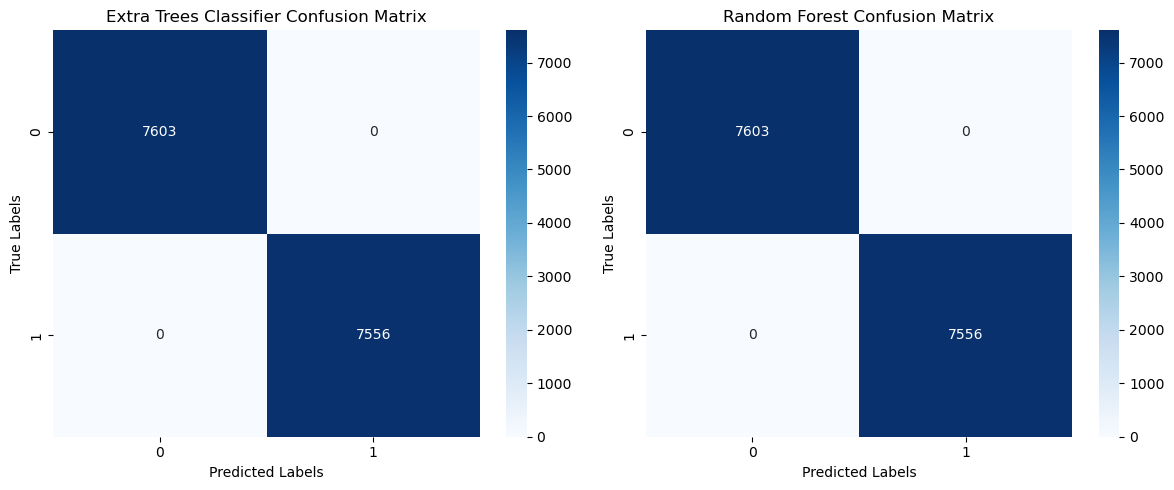

In [452]:
# Calculate confusion matrices for both models
cm_ET = confusion_matrix(y_test, y_pred_ET)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Extra Trees Classifier Confusion Matrix
sns.heatmap(cm_ET, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Extra Trees Classifier Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

###### ROC-AUC Curve------------Extra_Trees_and_Random_Forest

In [453]:
# Get predicted probabilities for the positive class
y_prob = clf_ET.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Extra Tress Classifier:", auc_score)

# Get predicted probabilities for the positive class
y_prob = clf_rf.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)

ROC AUC Score Of Extra Tress Classifier: 0.49758742073825446
ROC AUC Score Of Random Forest Classifier: 0.49671634138735044


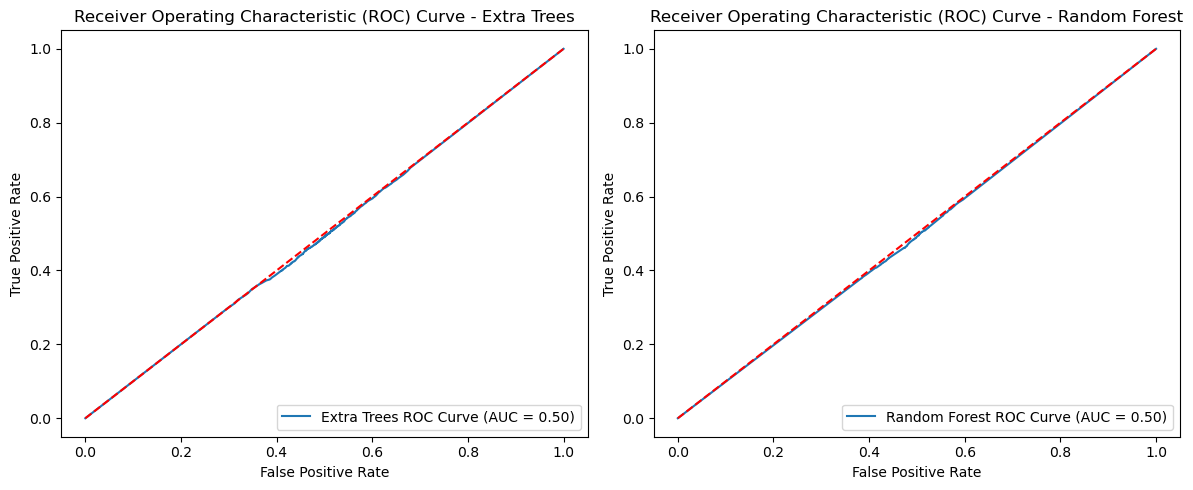

In [454]:
# Get predicted probabilities for the positive class for both classifiers
y_prob_et = clf_ET.predict_proba(x_test)[:, 1]
y_prob_rf = clf_rf.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores for both classifiers
auc_score_et = roc_auc_score(y_test, y_prob_et)
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

# Calculate ROC curves for both classifiers
fpr_et, tpr_et, _ = roc_curve(y_test, y_prob_et, pos_label=1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot ROC curve for Extra Trees Classifier
plt.subplot(1, 2, 1)
plt.plot(fpr_et, tpr_et, label='Extra Trees ROC Curve (AUC = {:.2f})'.format(auc_score_et))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Extra Trees')
plt.legend(loc='lower right')

# Plot ROC curve for Random Forest Classifier
plt.subplot(1, 2, 2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC Curve (AUC = {:.2f})'.format(auc_score_rf))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

###### Observation: Both models have comparable performance in terms of classification metrics.

Conclusion: Considering the overall evaluation, it appears that the Extra Trees Classifier has a slight advantage over the Random Forest Classifier in terms of training time and ROC AUC score. However, both models perform similarly in terms of classification metrics.

###### Time calculation

In [455]:
#importing module
import time

In [456]:
# Create instances of the classifiers
clf_ET = ExtraTreesClassifier()
clf_rf = RandomForestClassifier()

# Create empty variables to store training times
training_time_et = 0
training_time_rf = 0

# Record the start time and fit the Extra Trees Classifier
start_time_et = time.time()
clf_ET.fit(x_train, y_train)
end_time_et = time.time()
training_time_et = end_time_et - start_time_et

# Record the start time and fit the Random Forest Classifier
start_time_rf = time.time()
clf_rf.fit(x_train, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

# Print the training times
print("Training time for Extra Trees Classifier:", training_time_et, "seconds")
print("Training time for Random Forest Classifier:", training_time_rf, "seconds")

Training time for Extra Trees Classifier: 5.326710224151611 seconds
Training time for Random Forest Classifier: 8.187022686004639 seconds


###### Making predictions on test data using the best-performing model from the training data.

In [458]:
test_pred = clf_ET.predict(X_test)
test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [459]:
# Convert the NumPy array to a Pandas DataFrame
test_pred_df = pd.DataFrame(test_pred, columns=["Predicted_Label"])
test_pred_df

,Predicted_Label
0,0
1,0
2,1
3,0
4,1
...,...
15154,0
15155,1
15156,0
15157,0


###### Saving the model:

In [464]:
with open('best_model','wb') as f:
    pickle.dump(clf_ET,f)

In [466]:
pickle.dump(feature_scaler, open('scaler.pkl','wb'))